## LOS ANGELES CRIME DATA FROM 2020 TO 2023

# Ask 1 – Search for a dataset

#### Identify and describe your dataset

The dataset, sourced from the website https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data, compiles crime data in the city of Los Angeles from 2020 to the present, offering a comprehensive record of public safety incidents. With a substantial dataset of 843515 records, each row captures details of specific crimes, while the 28 columns provide a wealth of information including incident dates, locations, crime types, victim demographics, and investigative status. This dataset serves as a valuable resource for analyzing and understanding the dynamics of criminal activity in Los Angeles over the specified timeframe

#### Dataset Overview: Crime Incident Data

DR_NO: Unique report number assigned to each crime incident.

Date Rptd: Date when the crime was officially reported.

DATE OCC: Date of the actual occurrence of the crime.

TIME OCC: Time when the crime took place.

AREA: Numeric code indicating the geographic area where the incident occurred.

AREA NAME: Name of the geographic area where the incident occurred.

Rpt Dist No: Report district number associated with the incident.

Part 1-2: Classification of the crime as either Part 1 or Part 2.

Crm Cd: Code representing the type of crime.

Crm Cd Desc: Description of the crime.

Mocodes: Modus operandi codes providing details about the method used in the crime.

Vict Age: Age of the victim involved in the incident.

Vict Sex: Gender of the victim.

Vict Descent: Descent or ethnicity of the victim.

Premis Cd: Code indicating the type of premises where the incident occurred.

Premis Desc: Description of the premises.

Weapon Used Cd: Code indicating the weapon used in the crime.

Weapon Desc: Description of the weapon used.

Status: Current status of the crime report.

Status Desc: Description of the status of the crime report.

Crm Cd 1-4: Additional crime codes associated with the incident.

LOCATION: General location where the incident occurred.

Cross Street: Information about the cross street related to the incident.

LAT: Latitude coordinates of the incident location.

LON: Longitude coordinates of the incident location.

#### Why is important and what appeals to you about it

The importance of a dataset often lies in its relevance to a specific research question or analytical goal. If the dataset covers a wide range of crime incidents in Los Angeles from 2020 to the present, it could be crucial for studying crime patterns, identifying trends, and informing public safety strategies.

Datasets that provide a comprehensive view of a phenomenon, such as crime incidents, are valuable. The dataset you are using covers a significant time span (from 2020 to the present) and includes a large number of records (854k), making it potentially rich in information for various analyses.

A dataset's appeal often stems from the diversity of variables it includes. Your crime dataset contains 28 columns, covering aspects like date and time of occurrence, location, crime types, victim demographics, and more. This diversity allows for a nuanced exploration of crime-related factors.

Given that the dataset is specific to the city of Los Angeles, it is geographically focused. This can be advantageous for local policymakers, law enforcement agencies, and researchers seeking insights into crime dynamics within that particular region.


#### Is this dataset suitable for dimensional modeling and analytical analysis?


The crime dataset is suitable for dimensional modeling and analytical analysis due to its structured format and granular data. With key dimensions like time and location, along with fact and dimension tables, the dataset allows for comprehensive exploration of crime patterns. The inclusion of temporal information supports the creation of a time dimension for time-based analysis. Overall, these characteristics make the dataset well-suited for in-depth analytical investigations into crime trends and patterns.

In [1]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.4.1
psycopg2==2.9.5
psycopg2-binary==2.9.5


In [2]:
!dropdb -U student group15final

In [3]:
!createdb -U student group15final

In [4]:
%load_ext sql

In [5]:
%sql postgresql://student@/group15final

In [6]:
!wget https://balajigowda.s3.amazonaws.com/Crime_Data_from_2020_to_Present.zip

--2023-12-11 01:21:39--  https://balajigowda.s3.amazonaws.com/Crime_Data_from_2020_to_Present.zip
Resolving balajigowda.s3.amazonaws.com (balajigowda.s3.amazonaws.com)... 16.182.99.137, 3.5.9.201, 3.5.0.1, ...
Connecting to balajigowda.s3.amazonaws.com (balajigowda.s3.amazonaws.com)|16.182.99.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43789680 (42M) [application/zip]
Saving to: ‘Crime_Data_from_2020_to_Present.zip’

Crime_Data_from_202 100%[===================>]  41.76M  53.5MB/s    in 0.8s    

2023-12-11 01:21:40 (53.5 MB/s) - ‘Crime_Data_from_2020_to_Present.zip’ saved [43789680/43789680]



##### Unizipping the Crime_Data_from_2020_to_Present.zip file

In [7]:
!unzip -o Crime_Data_from_2020_to_Present.zip

Archive:  Crime_Data_from_2020_to_Present.zip
  inflating: Crime_Data_from_2020_to_Present.csv  


In [8]:
!mv Crime_Data_from_2020_to_Present.csv crimeData.csv

To get the counts and returns the total number of lines in the "crimeData.csv"

In [9]:
!wc -l crimeData.csv

843515 crimeData.csv


To display the all column names and their corresponding indices in the "crimeData.csv" file

In [10]:
!csvcut -n crimeData.csv

  1: DR_NO
  2: Date Rptd
  3: DATE OCC
  4: TIME OCC
  5: AREA
  6: AREA NAME
  7: Rpt Dist No
  8: Part 1-2
  9: Crm Cd
 10: Crm Cd Desc
 11: Mocodes
 12: Vict Age
 13: Vict Sex
 14: Vict Descent
 15: Premis Cd
 16: Premis Desc
 17: Weapon Used Cd
 18: Weapon Desc
 19: Status
 20: Status Desc
 21: Crm Cd 1
 22: Crm Cd 2
 23: Crm Cd 3
 24: Crm Cd 4
 25: LOCATION
 26: Cross Street
 27: LAT
 28: LON


Selecting only the relevant columns for analytics, the command extracts specific data from the "crimeData.csv" file and saves the refined dataset to a new file named "Crime_data.csv."

In [11]:
!csvcut -c 1,2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,25,26,27,28  crimeData.csv > Crime_data.csv

Exploring the dataset, checking data quality, and obtaining key information about the data's structure and characteristics.

In [12]:
!head -n 10000 Crime_data.csv | csvstat

  1. "DR_NO"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9999
	Smallest value:        10304468
	Largest value:         222108906
	Sum:                   2011509973880
	Mean:                  201171114.499
	Median:                200509281
	StDev:                 3442026.547
	Most common values:    10304468 (1x)
	                       190101086 (1x)
	                       200110444 (1x)
	                       191501505 (1x)
	                       191921269 (1x)

  2. "Date Rptd"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         557
	Smallest value:        2020-01-01 00:00:00
	Largest value:         2022-08-20 00:00:00
	Most common values:    2020-01-16 00:00:00 (161x)
	                       2020-01-30 00:00:00 (151x)
	                       2020-01-27 00:00:00 (135x)
	                       2020-01-28 00:00:00 (135x)
	                       2020-01-25 00:00:00 (130x)

  3. "DATE OCC"

	Type of data:    

### ASK - 2 Cleaning, filtering, merging , modeling steps

### Creating Tables

Dropping the table if it already exists, the command creates a new table named "CRIME_DATA" to house all the relevant data. This ensures a clean slate for the table, avoiding potential conflicts, and establishes a fresh structure to accommodate the dataset.

In [13]:
%%sql
DROP TABLE IF EXISTS CRIME_DATA;
CREATE TABLE CRIME_DATA(
    DR_NO      INTEGER NOT NULL,
    Date_Rptd  TIMESTAMP NOT NULL,
    Date_Occ   TIMESTAMP NOT NULL,
    Time_Occ   INTEGER,
    Area       CHAR(5)     NOT NULL,
    Area_Name  CHAR(255)      NOT NULL,
    Rpt_Dist_No INTEGER     NOT NULL,
    Crm_Cd     INTEGER   NOT NULL,
    Crm_Cd_Desc CHAR(60)     NOT NULL,
    Vict_Age   INTEGER,
    Vict_Sex   CHAR,
    Vict_Descent CHAR,
    Premis_Cd  INTEGER,
    Premis_Desc CHAR(64),
    Weapon_Used_Cd INTEGER,
    Weapon_Desc CHAR(50),
    Status     CHAR(5),
    Status_Desc CHAR(15),
    Location   CHAR(40) NOT NULL,
    Cross_Street CHAR(35),
    Lat    VARCHAR(25),
    Lon    VARCHAR(25)
);


 * postgresql://student@/group15final
Done.
Done.


[]

In [14]:
!pwd

/home/ubuntu/notebooks


This SQL command facilitates the seamless transfer of data from the specified file path ("Crime_data.csv") to the pre-existing "CRIME_DATA" table, streamlining the data loading process.

In [15]:
%%sql
COPY CRIME_DATA FROM '/home/ubuntu/notebooks/Crime_data.csv'
CSV
HEADER;

 * postgresql://student@/group15final
843514 rows affected.


[]

This SQL query retrieves the first five rows from the "CRIME_DATA" table, providing a glimpse of the dataset's structure and content.

In [16]:
%%sql
SELECT * FROM CRIME_DATA
LIMIT(5);

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,location,cross_street,lat,lon
10304468,2020-01-08 00:00:00,2020-01-08 00:00:00,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978
190101086,2020-01-02 00:00:00,2020-01-01 00:00:00,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,None,34.0459,-118.2545
200110444,2020-04-14 00:00:00,2020-02-13 00:00:00,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726,POLICE FACILITY,None,None,AA,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474
191501505,2020-01-01 00:00:00,2020-01-01 00:00:00,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,None,IC,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019
191921269,2020-01-01 00:00:00,2020-01-01 00:00:00,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",31,X,X,409,BEAUTY SUPPLY STORE,None,None,IC,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468


### Data Cleaning and Wrangling

Correcting inaccuracies in the dataset, the data cleaning process is underway to improve data accuracy and integrity.

This SQL query counts the number of records in the "CRIME_DATA" table where the victim's age is less than or equal to 0, providing insights into potential data anomalies.

In [17]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE Vict_Age <= 0
LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
209076


Correcting the "VICT_AGE" values to NULL for records where the victim's age is less than or equal to 0 is performed because the age of the victim cannot be validly represented as equal to or less than 0. This action is part of data cleaning to enhance the accuracy and reliability of the dataset.

In [18]:
%%sql
UPDATE CRIME_DATA
SET VICT_AGE = NULL
WHERE VICT_AGE <= 0

 * postgresql://student@/group15final
209076 rows affected.


[]

Ensuring that there are no entries indicating victims with ages less than 0.

In [19]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE Vict_Age <= 0
LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
0


In [20]:
%%sql
SELECT Vict_Sex, COUNT(*) as COUNTBYSEX
FROM CRIME_DATA
GROUP BY Vict_Sex
LIMIT 5;


 * postgresql://student@/group15final
5 rows affected.


vict_sex,countbysex
-,1
F,310271
H,92
M,347731
X,74103


In [21]:
%%sql
SELECT Vict_Descent, COUNT(*) AS COUNTBY_Vict_DESCENT
FROM CRIME_DATA
GROUP BY Vict_Descent
LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


vict_descent,countby_vict_descent
-,2
A,18494
B,119849
C,3260
D,64


In [22]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE Vict_Sex IS NULL
AND  Vict_Descent IS NULL
AND   Vict_Sex IS NULL
LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
111312


In [23]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE LAT = '0' AND LON = '0';

 * postgresql://student@/group15final
1 rows affected.


count
2263


In [24]:
%%sql
SELECT Area, Area_name, Lat, Lon, COUNT(*) as total_number
FROM CRIME_DATA
WHERE Lat = '0' AND Lon = '0'
GROUP BY Area, Area_name, Lat, Lon
LIMIT 25;

 * postgresql://student@/group15final
21 rows affected.


area,area_name,lat,lon,total_number
1,Central,0,0,194
10,West Valley,0,0,37
11,Northeast,0,0,43
12,77th Street,0,0,137
13,Newton,0,0,98
14,Pacific,0,0,173
15,N Hollywood,0,0,92
16,Foothill,0,0,74
17,Devonshire,0,0,96
18,Southeast,0,0,160


### Creating the Dimension and Fact Tables

##### Creating and Loading Data for the Facts as FACT_TABLE

In [25]:
%%sql
DROP TABLE IF EXISTS FACT_TABLE;

CREATE TABLE FACT_TABLE (
    DR_NO      INTEGER NOT NULL,
    Date_Rptd  TIMESTAMP NOT NULL,
    Date_Occ   TIMESTAMP NOT NULL,
    Time_Occ   INTEGER,
    Area       CHAR(5)     NOT NULL,
    Rpt_Dist_No INTEGER     NOT NULL,
    Crm_Cd     INTEGER   NOT NULL,
    Vict_Age   INTEGER,
    Vict_Sex   CHAR,
    Vict_Descent CHAR,
    Premis_Cd  INTEGER,
    Weapon_Used_Cd INTEGER,
    Status     CHAR(5),
    Location   CHAR(40) NOT NULL,
    Cross_Street CHAR(35),
    Lat    VARCHAR(25),
    Lon    VARCHAR(25),
    PRIMARY KEY (DR_NO)
)

 * postgresql://student@/group15final
Done.
Done.


[]

Inserting data from Crime_Data to Fact_table

In [26]:
%%sql
INSERT INTO FACT_TABLE (DR_NO, DATE_RPTD, DATE_OCC, TIME_OCC, AREA, RPT_DIST_NO,
    CRM_CD,VICT_AGE,VICT_SEX,VICT_DESCENT, PREMIS_CD, WEAPON_USED_CD, STATUS, LOCATION, CROSS_STREET, LAT, LON)
SELECT DISTINCT DR_NO, DATE_RPTD, DATE_OCC, TIME_OCC, AREA, RPT_DIST_NO,
    CRM_CD,VICT_AGE,VICT_SEX,VICT_DESCENT, PREMIS_CD, WEAPON_USED_CD, STATUS, LOCATION, CROSS_STREET, LAT, LON
FROM Crime_Data
WHERE DR_NO IS NOT NULL;

 * postgresql://student@/group15final
843514 rows affected.


[]

Ensuring Successful Data Insertion

In [27]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon
817,2020-09-20 00:00:00,2020-09-19 00:00:00,1700,17,1777,510,None,None,None,101,None,IC,9100 RUBIO AV,None,34.2367,-118.4955
2113,2021-06-21 00:00:00,2021-04-05 00:00:00,1835,13,1385,510,None,None,None,101,None,IC,800 E GAGE AV,None,33.982,-118.2622
2203,2022-12-31 00:00:00,2022-12-19 00:00:00,1930,3,356,522,None,None,None,502,None,IC,1400 W 37TH ST,None,34.021,-118.3002
2315,2023-07-23 00:00:00,2023-07-22 00:00:00,1800,15,1566,420,None,None,None,101,None,IC,4400 ENSIGN AV,None,34.1504,-118.3712
10304468,2020-01-08 00:00:00,2020-01-08 00:00:00,2230,3,377,624,36,F,B,501,400,AO,1100 W 39TH PL,None,34.0141,-118.2978


##### Creating and Loading Data for the Crime Dimension as Crime_Table

In [28]:
%%sql
DROP TABLE IF EXISTS Crime_Table;
CREATE TABLE Crime_Table (
    Crime_key SERIAL PRIMARY KEY,
    Crm_cd INTEGER NOT NULL,
    Crm_cd_desc CHAR(200) NOT NULL
);

 * postgresql://student@/group15final
Done.
Done.


[]

Inserting the Data for the Crime_Table

In [29]:
%%sql
INSERT INTO Crime_Table (Crm_cd, Crm_cd_desc)
SELECT DISTINCT Crm_cd, Crm_cd_desc
FROM Crime_Data
WHERE Crm_cd IS NOT NULL;

 * postgresql://student@/group15final
138 rows affected.


[]

Ensuring Successful Data Insertion

In [30]:
%%sql
SELECT * FROM Crime_Table LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


crime_key,crm_cd,crm_cd_desc
1,110,CRIMINAL HOMICIDE
2,113,"MANSLAUGHTER, NEGLIGENT"
3,121,"RAPE, FORCIBLE"
4,122,"RAPE, ATTEMPTED"
5,210,ROBBERY


Updating the Fact_Table: Incorporating a new column, Crime_Key, as a Foreign Key, to refresh and fortify the Fact_Table with strengthened interconnections for comprehensive data analysis.

In [31]:
%%sql
ALTER TABLE FACT_TABLE
ADD COLUMN crime_key INTEGER,
ADD CONSTRAINT fk_Crime_Table
    FOREIGN KEY (crime_key)
    REFERENCES Crime_Table(crime_key)

 * postgresql://student@/group15final
Done.


[]

In [32]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key
817,2020-09-20 00:00:00,2020-09-19 00:00:00,1700,17,1777,510,None,None,None,101,None,IC,9100 RUBIO AV,None,34.2367,-118.4955,None
2113,2021-06-21 00:00:00,2021-04-05 00:00:00,1835,13,1385,510,None,None,None,101,None,IC,800 E GAGE AV,None,33.982,-118.2622,None
2203,2022-12-31 00:00:00,2022-12-19 00:00:00,1930,3,356,522,None,None,None,502,None,IC,1400 W 37TH ST,None,34.021,-118.3002,None
2315,2023-07-23 00:00:00,2023-07-22 00:00:00,1800,15,1566,420,None,None,None,101,None,IC,4400 ENSIGN AV,None,34.1504,-118.3712,None
10304468,2020-01-08 00:00:00,2020-01-08 00:00:00,2230,3,377,624,36,F,B,501,400,AO,1100 W 39TH PL,None,34.0141,-118.2978,None


In [33]:
%%sql
UPDATE FACT_TABLE AS F
SET CRIME_KEY = C.CRIME_KEY
FROM CRIME_Table AS C
WHERE F.CRM_CD = C.CRM_CD;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [34]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key
200100694,2020-03-20 00:00:00,2020-03-17 00:00:00,230,1,162,745,None,M,W,203,None,IC,700 W 7TH ST,None,34.048,-118.2577,81
200113661,2020-06-19 00:00:00,2020-06-15 00:00:00,2030,1,192,510,None,None,None,108,None,IC,1400 S FIGUEROA ST,None,34.0393,-118.2689,57
200114168,2020-06-30 00:00:00,2020-02-01 00:00:00,1800,1,142,510,None,None,None,108,None,IC,300 S OLIVE ST,None,34.0516,-118.2508,57
200114472,2020-07-07 00:00:00,2020-07-07 00:00:00,715,1,111,510,None,None,None,101,None,IC,600 N HILL ST,None,34.0591,-118.2412,57
200116512,2020-08-17 00:00:00,2020-08-11 00:00:00,1657,1,121,510,None,None,None,101,None,IC,100 N FREMONT AV,None,34.0584,-118.2531,57


In [35]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE 
WHERE CRIME_KEY IS NULL LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
0


##### Creating and Loading Data for the Location Dimension as Location_Table

In [36]:
%%sql
DROP TABLE IF EXISTS Location_Table;

CREATE TABLE Location_Table (
    location_key SERIAL PRIMARY KEY NOT NULL,
    Area CHAR(5) NOT NULL,
    Area_Name CHAR(255) NOT NULL,
    Rpt_Dist_No VARCHAR(25) NOT NULL,
    Location CHAR(40) NOT NULL,
    Cross_Street CHAR(35),
    Lat VARCHAR(25),
    Lon VARCHAR(25)
)

 * postgresql://student@/group15final
Done.
Done.


[]

Inserting Data into the Location Table

In [37]:
%%sql
INSERT INTO Location_Table (Area, Area_Name,Rpt_Dist_No, Location, Cross_Street, Lat, Lon)
SELECT DISTINCT Area, Area_Name,Rpt_Dist_No, Location, Cross_Street,Lat, Lon
FROM Crime_Data;

 * postgresql://student@/group15final
176910 rows affected.


[]

In [38]:
%%sql
SELECT COUNT(*) FROM Location_Table LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
176910


Because the information allocated to the location table does not include a suitable primary key, a serial key was assigned as location_id. The following 2 cells update the FACT_TABLE to include this new id. This process is repeated for the victim table.

In [39]:
%%sql
ALTER TABLE FACT_TABLE
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_Location_Table
    FOREIGN KEY (location_key)
    REFERENCES Location_Table(location_key)


 * postgresql://student@/group15final
Done.


[]

In [40]:
%%sql 
Select * FROM Fact_Table Limit 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key
200116512,2020-08-17 00:00:00,2020-08-11 00:00:00,1657,1,121,510,None,None,None,101,None,IC,100 N FREMONT AV,None,34.0584,-118.2531,57,None
200120211,2020-10-28 00:00:00,2020-10-28 00:00:00,1000,1,119,845,None,M,O,834,None,AO,800 N VIGNES ST,None,34.0559,-118.232,101,None
200121174,2020-11-17 00:00:00,2020-11-17 00:00:00,1500,1,145,420,None,None,None,101,None,IC,400 S LOS ANGELES ST,None,34.0471,-118.2474,29,None
200121239,2020-11-18 00:00:00,2020-11-17 00:00:00,1000,1,195,510,None,None,None,108,None,AA,1400 MAPLE AV,None,34.0335,-118.2619,57,None
200122047,2020-12-07 00:00:00,2020-12-07 00:00:00,1000,1,111,510,None,None,None,108,None,IC,600 N FIGUEROA ST,None,34.0627,-118.2463,57,None


In [41]:
%%sql
UPDATE FACT_TABLE AS F
SET LOCATION_KEY = L.LOCATION_KEY
FROM LOCATION_TABLE AS L
WHERE F.AREA = L.AREA AND
      F.RPT_DIST_NO = CAST(L.RPT_DIST_NO AS INTEGER) AND
      F.LOCATION = L.LOCATION AND
      F.LAT = L.LAT AND
      F.LON = L.LON;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [42]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key
200122047,2020-12-07 00:00:00,2020-12-07 00:00:00,1000,1,111,510,None,None,None,108,None,IC,600 N FIGUEROA ST,None,34.0627,-118.2463,57,322
200204580,2020-01-13 00:00:00,2020-01-12 00:00:00,2100,2,275,420,None,None,None,101,None,IC,900 S ALVARADO ST,None,34.0534,-118.2788,29,103782
200208394,2020-03-31 00:00:00,2020-03-30 00:00:00,1200,2,291,420,None,None,None,101,None,IC,1300 S WESTLAKE AV,None,34.0467,-118.2814,29,104358
200208578,2020-04-05 00:00:00,2020-04-04 00:00:00,1700,2,204,510,None,None,None,101,None,IC,700 TULAROSA DR,None,34.0815,-118.281,57,97960
200210187,2020-05-14 00:00:00,2020-05-14 00:00:00,1745,2,251,420,None,None,None,101,None,IC,500 S CORONADO ST,None,34.0628,-118.2811,29,102310


In [43]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE
WHERE LOCATION_KEY IS NULL LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
0


In [44]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
843514


In [45]:
%%sql 
Select * FROM Fact_Table Limit 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key
200210187,2020-05-14 00:00:00,2020-05-14 00:00:00,1745,2,251,420,None,None,None,101,None,IC,500 S CORONADO ST,None,34.0628,-118.2811,29,102310
200212451,2020-07-11 00:00:00,2020-07-11 00:00:00,1930,2,256,510,None,None,None,108,None,IC,1700 W 6TH ST,None,34.0573,-118.2699,57,102413
200214424,2020-08-31 00:00:00,2020-08-30 00:00:00,1900,2,246,510,None,None,None,101,None,IC,600 S WESTLAKE AV,None,34.0598,-118.2734,57,101624
200214484,2020-09-02 00:00:00,2020-09-01 00:00:00,2000,2,279,510,None,None,None,101,None,IC,1400 W 10TH PL,None,34.0474,-118.2714,57,103927
200215184,2020-09-18 00:00:00,2020-09-18 00:00:00,1955,2,204,510,None,None,None,101,None,IC,700 HYPERION AV,None,34.0847,-118.2845,57,97953


##### Creating and Loading Data for Victim Dimension as Victim_Table

In [46]:
%%sql
DROP TABLE IF EXISTS Victim_Table;

CREATE TABLE Victim_Table (
    Victim_Key SERIAL PRIMARY KEY,
    Vict_Sex CHAR,
    Vict_Descent CHAR,
    Vict_Age INTEGER
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [47]:
%%sql
INSERT INTO Victim_Table (Vict_Sex, Vict_Descent, Vict_Age)
SELECT DISTINCT Vict_Sex, Vict_Descent, Vict_Age
FROM Crime_Data;

 * postgresql://student@/group15final
2785 rows affected.


[]

In [48]:
%%sql
SELECT * FROM VICTIM_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


victim_key,vict_sex,vict_descent,vict_age
1,None,None,None
2,F,K,81
3,M,O,75
4,F,A,41
5,M,J,69


Updating the Fact_Table: Incorporating a new column, Victim_key, as a Foreign Key, to refresh and fortify the Fact_Table with strengthened interconnections for comprehensive data analysis.

In [49]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS Victim_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN Victim_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_VICTIM_TABLE
    FOREIGN KEY (Victim_Key)
    REFERENCES VICTIM_Table(VICTIM_KEY);


 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [50]:
%%sql
UPDATE FACT_TABLE AS F
SET Victim_Key = V.Victim_Key
FROM Victim_Table AS V
WHERE F.VICT_AGE = V.VICT_AGE AND
      F.VICT_SEX = V.VICT_SEX AND
      F.VICT_DESCENT = V.VICT_DESCENT;

 * postgresql://student@/group15final
634405 rows affected.


[]

##### Creating and Loading Data for the Premis Dimension as Premis_Table

In [51]:
%%sql
DROP TABLE IF EXISTS Premis_Table;

CREATE TABLE Premis_Table (
    Premis_Key SERIAL PRIMARY KEY,
    Premis_Cd INTEGER,
    Premis_Desc CHAR(64)
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [52]:
%%sql
INSERT INTO Premis_Table (Premis_Cd, Premis_Desc)
SELECT DISTINCT Premis_Cd, Premis_Desc
FROM Crime_Data
WHERE Premis_Cd IS NOT NULL;

 * postgresql://student@/group15final
313 rows affected.


[]

In [53]:
%%sql
SELECT * FROM Premis_Table LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


premis_key,premis_cd,premis_desc
1,101,STREET
2,102,SIDEWALK
3,103,ALLEY
4,104,DRIVEWAY
5,105,PEDESTRIAN OVERCROSSING


Updating the Fact_Table: Incorporating a new column, Premis_Key, as a Foreign Key, to refresh and fortify the Fact_Table with strengthened interconnections for comprehensive data analysis.

In [54]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS Premis_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN Premis_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_Premis_Table
    FOREIGN KEY (Premis_Key)
    REFERENCES Premis_Table(Premis_Key);


 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [55]:
%%sql
UPDATE FACT_TABLE AS F
SET Premis_Key = P.Premis_Key
FROM Premis_Table AS P
WHERE F.Premis_Cd = P.Premis_Cd;

 * postgresql://student@/group15final
843504 rows affected.


[]

In [56]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key,victim_key,premis_key
200215184,2020-09-18 00:00:00,2020-09-18 00:00:00,1955,2,204,510,None,None,None,101,None,IC,700 HYPERION AV,None,34.0847,-118.2845,57,97953,None,1
200216270,2020-10-17 00:00:00,2020-10-10 00:00:00,2000,2,289,510,None,None,None,101,None,IC,1200 S ALBANY ST,None,34.0441,-118.2735,57,104259,None,1
200309179,2020-03-29 00:00:00,2020-03-28 00:00:00,1800,3,361,510,None,None,None,101,None,IC,4000 URSULA AV,None,34.0149,-118.3524,57,125365,None,1
200310515,2020-04-27 00:00:00,2020-04-27 00:00:00,1500,3,362,420,None,None,None,101,None,IC,4000 COCO AV,None,34.0141,-118.3501,29,125518,None,1
200311426,2020-05-17 00:00:00,2020-05-16 00:00:00,2330,3,373,510,None,None,None,104,None,IC,3900 HUBERT AV,None,34.0142,-118.3281,57,126137,None,4


In [57]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE 
WHERE PREMIS_KEY IS NULL LIMIT 15;

 * postgresql://student@/group15final
1 rows affected.


count
10


##### Creating a new Dimension Table for Weapons as Weapon_Table

In [58]:
%%sql
DROP TABLE IF EXISTS Weapon_Table;

CREATE TABLE Weapon_Table (
    WEAPON_KEY SERIAL PRIMARY KEY,
    WEAPON_USED_CD INTEGER,
    WEAPON_USED_DESC VARCHAR(50)
)

 * postgresql://student@/group15final
Done.
Done.


[]

In [59]:
%%sql
INSERT INTO Weapon_Table (WEAPON_USED_CD, WEAPON_USED_DESC)
SELECT DISTINCT WEAPON_USED_CD, WEAPON_DESC
FROM Crime_Data;

 * postgresql://student@/group15final
80 rows affected.


[]

In [60]:
%%sql
SELECT * FROM WEAPON_TABLE
LIMIT 25;

 * postgresql://student@/group15final
25 rows affected.


weapon_key,weapon_used_cd,weapon_used_desc
1,None,None
2,220,SYRINGE
3,112,TOY GUN
4,507,LIQUOR/DRUGS
5,208,RAZOR
6,121,HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE
7,503,CAUSTIC CHEMICAL/POISON
8,216,SCISSORS
9,202,BOWIE KNIFE
10,508,MARTIAL ARTS WEAPONS


Updating the Fact_Table: Incorporating a new column, Weapon_Key, as a Foreign Key, to refresh and fortify the Fact_Table with strengthened interconnections for comprehensive data analysis.

In [61]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS Weapon_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN Weapon_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_Weapon_Table
    FOREIGN KEY (Weapon_Key)
    REFERENCES Weapon_Table(Weapon_Key);

 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [62]:
%%sql
UPDATE FACT_TABLE AS F
SET Weapon_Key = W.Weapon_Key
FROM Weapon_Table AS W
WHERE F.Weapon_Used_Cd = W.Weapon_Used_Cd;

 * postgresql://student@/group15final
293900 rows affected.


[]

In [63]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5 ;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key,victim_key,premis_key,weapon_key
200310515,2020-04-27 00:00:00,2020-04-27 00:00:00,1500,3,362,420,None,None,None,101,None,IC,4000 COCO AV,None,34.0141,-118.3501,29,125518,None,1,None
200311426,2020-05-17 00:00:00,2020-05-16 00:00:00,2330,3,373,510,None,None,None,104,None,IC,3900 HUBERT AV,None,34.0142,-118.3281,57,126137,None,4,None
200312154,2020-06-01 00:00:00,2020-05-25 00:00:00,2200,3,362,510,None,None,None,101,None,IC,4600 COLISEUM ST,None,34.017,-118.3471,57,125554,None,1,None
200315311,2020-08-06 00:00:00,2020-08-04 00:00:00,2300,3,356,510,None,None,None,101,None,AA,1400 W 35TH ST,None,34.0246,-118.3007,57,124522,None,1,None
200315897,2020-08-17 00:00:00,2020-08-17 00:00:00,945,3,326,745,54,F,B,502,None,IC,2600 S NORMANDIE AV,None,0,0,81,121766,815,132,None


##### Creating a new Dimension Table for Status as Status_Table

In [64]:
%%sql
DROP TABLE IF EXISTS Status_Table;

CREATE TABLE Status_Table (
    STATUS_KEY SERIAL PRIMARY KEY,
    Status VARCHAR(2),
    Status_Desc VARCHAR(15)
)

 * postgresql://student@/group15final
Done.
Done.


[]

In [65]:
%%sql
INSERT INTO Status_Table (Status, Status_Desc)
SELECT DISTINCT Status, Status_Desc
FROM Crime_Data;

 * postgresql://student@/group15final
6 rows affected.


[]

In [66]:
%%sql
SELECT * FROM Status_Table
LIMIT 25;

 * postgresql://student@/group15final
6 rows affected.


status_key,status,status_desc
1,JO,Juv Other
2,IC,Invest Cont
3,JA,Juv Arrest
4,CC,UNK
5,AA,Adult Arrest
6,AO,Adult Other


Updating the Fact_Table: Incorporating a new column, Status_Key, as a Foreign Key, to refresh and fortify the Fact_Table with strengthened interconnections for comprehensive data analysis.

In [67]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS STATUS_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN STATUS_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_STATUS_Table
    FOREIGN KEY (STATUS_Key)
    REFERENCES STATUS_Table(STATUS_Key);

 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [68]:
%%sql
UPDATE FACT_TABLE AS F
SET STATUS_Key = S.STATUS_Key
FROM STATUS_Table AS S
WHERE F.STATUS = S.STATUS;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [69]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5 ;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key,victim_key,premis_key,weapon_key,status_key
200315897,2020-08-17 00:00:00,2020-08-17 00:00:00,945,3,326,745,54,F,B,502,None,IC,2600 S NORMANDIE AV,None,0,0,81,121766,815,132,None,2
200316956,2020-09-07 00:00:00,2020-09-07 00:00:00,410,3,311,510,None,None,None,101,None,AO,5300 W ADAMS BL,None,34.0325,-118.3591,57,120148,None,1,None,6
200318079,2020-09-30 00:00:00,2020-09-30 00:00:00,30,3,399,510,None,None,None,101,None,IC,400 W 41ST PL,None,34.0083,-118.2821,57,129355,None,1,None,2
200319667,2020-11-01 00:00:00,2020-10-31 00:00:00,1700,3,316,510,None,None,None,101,None,IC,2200 S HOBART BL,None,34.0348,-118.3078,57,120929,None,1,None,2
200321978,2020-12-20 00:00:00,2020-12-19 00:00:00,2300,3,356,510,None,None,None,101,None,IC,1400 W 36TH ST,None,34.0228,-118.3002,57,124525,None,1,None,2


##### Creating a new Dimension Table for Date as Date_Table

The following cell parses the dates from the raw fields "Date_Rptd" and "Date_Occ" into multiple variables that allow for further analysis. This analysis could include whether a crime is associated with a weekday or a weekend, or which month of the year has the most crimes reported, etc.

In [70]:
%%sql
DROP TABLE IF EXISTS DATE;

CREATE TABLE DATE (
    key SERIAL PRIMARY KEY,
    hour timestamp,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [71]:
%%sql
INSERT INTO DATE(HOUR, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_TIMESTAMP(TO_CHAR(date_occ, 'YYYY-MM-DD HH24:00:00'), 'YYYY-MM-DD HH24:MI:SS') AS hour,
    TO_CHAR(date_occ, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date_occ, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date_occ, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date_occ, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date_occ, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date_occ, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date_occ, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date_occ, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date_occ, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date_occ, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date_occ, 'Q') AS INTEGER) AS quarter_of_year
FROM FACT_TABLE
UNION
SELECT DISTINCT TO_TIMESTAMP(TO_CHAR(date_rptd, 'YYYY-MM-DD HH24:00:00'), 'YYYY-MM-DD HH24:MI:SS') AS hour,
    TO_CHAR(date_rptd, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date_rptd, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date_rptd, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date_rptd, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date_rptd, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date_rptd, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date_rptd, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date_rptd, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date_rptd, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date_rptd, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date_rptd, 'Q') AS INTEGER) AS quarter_of_year
FROM FACT_TABLE;


 * postgresql://student@/group15final
1420 rows affected.


[]

In [72]:
%%sql
SELECT * FROM DATE
LIMIT 10;

 * postgresql://student@/group15final
10 rows affected.


key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2022-03-03 00:00:00,2022-03-03,2022,March,3,3,Thursday,5,False,True,0,1
2,2020-06-28 00:00:00,2020-06-28,2020,June,6,28,Sunday,1,True,False,0,2
3,2023-07-11 00:00:00,2023-07-11,2023,July,7,11,Tuesday,3,False,True,0,3
4,2021-03-03 00:00:00,2021-03-03,2021,March,3,3,Wednesday,4,False,True,0,1
5,2022-12-13 00:00:00,2022-12-13,2022,December,12,13,Tuesday,3,False,True,0,4
6,2023-09-24 00:00:00,2023-09-24,2023,September,9,24,Sunday,1,True,False,0,3
7,2022-01-19 00:00:00,2022-01-19,2022,January,1,19,Wednesday,4,False,True,0,1
8,2023-05-03 00:00:00,2023-05-03,2023,May,5,3,Wednesday,4,False,True,0,2
9,2022-02-20 00:00:00,2022-02-20,2022,February,2,20,Sunday,1,True,False,0,1
10,2021-03-16 00:00:00,2021-03-16,2021,March,3,16,Tuesday,3,False,True,0,1


Updating the Fact_Table: Incorporating a new column, Date_Occ_Key and Date_rptd_key, as a Foreign Key, to refresh and fortify the Fact_Table with strengthened interconnections for comprehensive data analysis.

In [73]:
%%sql

ALTER TABLE FACT_TABLE
ADD COLUMN DATE_OCC_Key INTEGER,
ADD COLUMN DATE_RPTD_Key INTEGER;


ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_hour_occ
    FOREIGN KEY (DATE_OCC_Key)
    REFERENCES DATE(Key);

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_hour_rptd
    FOREIGN KEY (DATE_RPTD_Key)
    REFERENCES DATE(Key);


 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [74]:
%%sql
UPDATE FACT_TABLE AS F
SET DATE_OCC_Key = D.Key
FROM DATE AS D
WHERE TO_CHAR(F.DATE_OCC, 'YYYY-MM-DD HH24:MI:SS') = TO_CHAR(D.hour, 'YYYY-MM-DD HH24:MI:SS');


 * postgresql://student@/group15final
843514 rows affected.


[]

In [75]:
%%sql
UPDATE FACT_TABLE AS F
SET DATE_RPTD_Key = D.Key
FROM DATE AS D
WHERE TO_CHAR(F.DATE_RPTD, 'YYYY-MM-DD HH24:MI:SS') = TO_CHAR(D.hour, 'YYYY-MM-DD HH24:MI:SS');

 * postgresql://student@/group15final
843514 rows affected.


[]

Adding foreign key constraints to the FACT_TABLE, linking it to the corresponding primary key columns in other tables (Victim_Table, Location_Table, Crime_table, Premis_Table, Weapon_Table, Status_Table, and DATE). These constraints enforce referential integrity, ensuring that each foreign key value in FACT_TABLE corresponds to a valid primary key in the respective referenced tables.

In [76]:
%%sql
ALTER TABLE FACT_TABLE add FOREIGN KEY (VICTIM_KEY) references Victim_Table(victim_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (LOCATION_KEY) references Location_Table(location_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (CRIME_KEY) references Crime_table(CRIME_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (PREMIS_KEY) references Premis_Table(Premis_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (WEAPON_KEY) references Weapon_Table(WEAPON_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (Status_KEY) references Status_Table(Status_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (DATE_OCC_KEY) references DATE(KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (DATE_RPTD_KEY) references DATE(KEY);

 * postgresql://student@/group15final
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In the provided SQL statements, the FACT_TABLE is altered by dropping columns associated with reporting date, time, location details, crime attributes, victim information, premises, weapons, and status. This operation simplifies the table by eliminating redundant or unnecessary data fields.

In [77]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN DATE_RPTD,
DROP COLUMN DATE_OCC,
DROP COLUMN TIME_OCC,
DROP COLUMN AREA,
DROP COLUMN RPT_DIST_NO,
DROP COLUMN CRM_CD,
DROP COLUMN VICT_AGE,
DROP COLUMN VICT_SEX,
DROP COLUMN VICT_DESCENT,
DROP COLUMN PREMIS_CD,
DROP COLUMN WEAPON_USED_CD,
DROP COLUMN STATUS,
DROP COLUMN LOCATION,
DROP COLUMN CROSS_STREET,
DROP COLUMN LAT,
DROP COLUMN LON;

 * postgresql://student@/group15final
Done.


[]

View fact table again now with additional fields

In [78]:
%%sql
SELECT * FROM FACT_TABLE
LIMIT 10;

 * postgresql://student@/group15final
10 rows affected.


dr_no,crime_key,location_key,victim_key,premis_key,weapon_key,status_key,date_occ_key,date_rptd_key
200321978,57,124525,None,1,None,2,1192,455
200404979,57,137178,None,1,None,2,796,441
200411245,57,130607,None,1,None,2,1110,125
200411854,57,131026,None,1,None,2,1154,1154
200411988,29,135928,None,1,None,2,142,952
200415359,115,136359,1459,4,None,2,1134,1134
200505213,29,140159,None,8,None,2,401,401
200505858,57,146496,None,1,None,2,108,1257
200510709,113,140726,2685,131,None,2,1367,1367
200518295,57,141545,None,1,None,2,88,88


# Ask 3: Data analysis and visualization

Importing the PySpark, Pandas, Matplotlib, Seaborn for visualization

In [79]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Convering the Tables into Dataframes for better Visualization

In [80]:
connection_url = 'postgresql://student@/group15final'

table_names = ['fact_table', 'crime_table', 'location_table', 'date', 'premis_table', 'weapon_table', 'status_table']


dfs = {}

for table_name in table_names:
    df = pd.read_sql_table(table_name, connection_url, index_col=0)  # Assuming the first column is the index
    dfs[table_name] = df

for table_name, df in dfs.items():
    print(f"\nTable: {table_name}")
    print(df.head())
fact_table_df = dfs['fact_table']
crime_table_df = dfs['crime_table']
location_table_df = dfs['location_table']
date_df = dfs['date']
premis_table_df = dfs['premis_table']
weapon_table_df = dfs['weapon_table']
status_table_df = dfs['status_table']



Table: fact_table
       dr_no  crime_key  location_key  victim_key  premis_key  weapon_key  \
0  200518295         57        141545         NaN         1.0         NaN   
1  200607573         57        152673         NaN         1.0         NaN   
2  200610488         57        153210         NaN       167.0         NaN   
3  200611471         80        148920         NaN         8.0         NaN   
4  200612251         57        147658         NaN         1.0         NaN   

   status_key  date_occ_key  date_rptd_key  
0           2            88             88  
1           6           820            820  
2           5          1217           1217  
3           2           318            687  
4           2          1108            993  

Table: crime_table
   crime_key  crm_cd                                        crm_cd_desc
0          1     110  CRIMINAL HOMICIDE                             ...
1          2     113  MANSLAUGHTER, NEGLIGENT                       ...
2          3

## Question 1 :

## *How has the overall crime rate in the city evolved over the past few years?*

To effectively analyze the evolution of the city's overall crime rate over the past few years, our approach involves a multi-dimensional examination of the available crime data. Firstly, we focus on the annual aggregation of crime incidents, providing a clear picture of the year-over-year changes in crime rate. This broad perspective is crucial to understand the general trend, whether there's an increase or decrease in criminal activities over the years.

Furthermore, to gain a deeper understanding of seasonal and monthly variations in crime patterns, we dissect the data into more granular time segments. By breaking down the crime statistics by quarters and months within each year, we can identify specific periods that demonstrate a notable increase or decrease in crime rates. Such detailed analysis enables us to pinpoint times of the year when the city experiences higher criminal activities, potentially correlating these periods with various socio-economic factors or seasonal events.

We use this SQL query to calculate the total number of crimes recorded in our fact_table.

In [81]:
%%sql
SELECT
    COUNT(crime_key) AS total_crimes
FROM
    fact_table;

 * postgresql://student@/group15final
1 rows affected.


total_crimes
843514


We use this SQL query to determine the total number of crimes for each year by joining our fact table with the date table and grouping the results by year.

In [82]:
%%sql
SELECT
    date.year,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    date ON ft.date_occ_key = date.key
GROUP BY
    date.year;

 * postgresql://student@/group15final
4 rows affected.


year,total_crimes
2020,199457
2021,209426
2022,234375
2023,200256


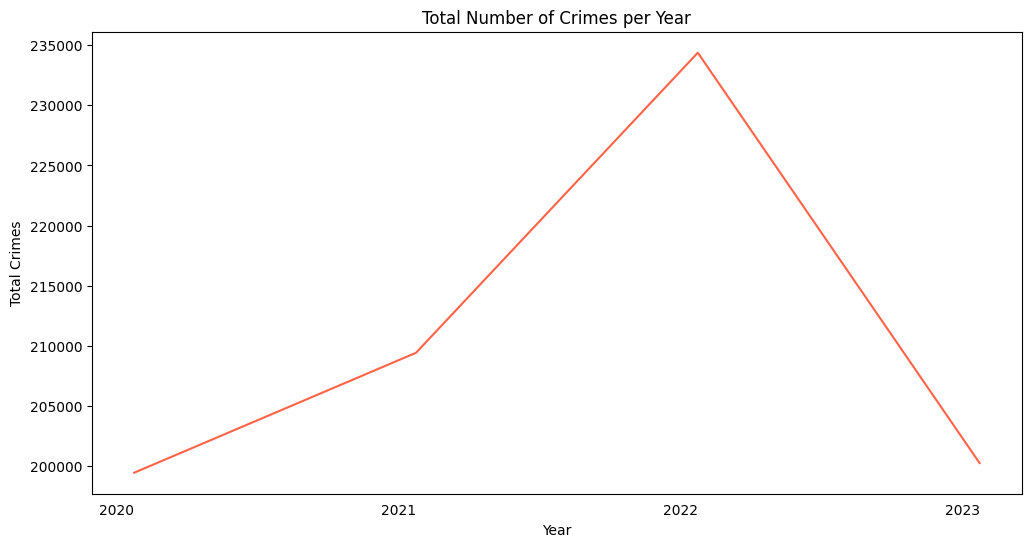

In [83]:

query = """
    SELECT
        date.year,
        COUNT(ft.crime_key) AS total_crimes
    FROM
        fact_table ft
    JOIN
        date ON ft.date_occ_key = date.key
    GROUP BY
        date.year
"""

crime_count_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(12, 6))
plt.plot(crime_count_df['year'], crime_count_df['total_crimes'], color='tomato')  
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.xticks(crime_count_df['year'], rotation=0, ha='right')  
plt.tick_params(axis='x', which='both', bottom=False, top=False)  
plt.grid(False)  
plt.show()


The data reveals a fluctuating trend in total crimes during this period. In 2020, there were 199,470 reported crimes, which increased to 209,440 in 2021. The year 2022 saw the highest number of reported crimes at 234,401, followed by a slight decrease to 204,414 in 2023.

Then, we use this SQL query to calculate the total number of crimes for each quarter of each year, by joining our fact table with the date table and grouping the results by both year and quarter.

In [84]:
%%sql
SELECT
    date.year,
    date.quarter_of_year,
    COUNT(fact_table.crime_key) AS total_crimes
FROM
    fact_table
JOIN
    date ON fact_table.date_occ_key = date.key
GROUP BY
    date.year, date.quarter_of_year
ORDER BY
    date.year, date.quarter_of_year;


 * postgresql://student@/group15final
16 rows affected.


year,quarter_of_year,total_crimes
2020,1,51910
2020,2,49917
2020,3,49626
2020,4,48004
2021,1,48278
2021,2,50197
2021,3,55390
2021,4,55561
2022,1,55826
2022,2,60394


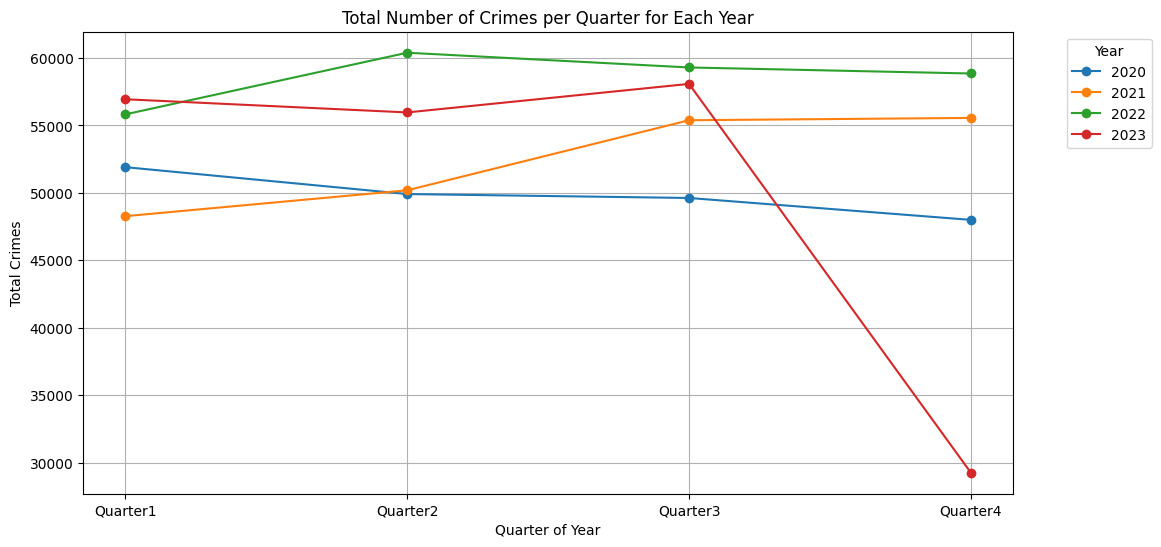

In [85]:

query = """
    SELECT
        date.year,
        date.quarter_of_year,
        COUNT(fact_table.crime_key) AS total_crimes
    FROM
        fact_table
    JOIN
        date ON fact_table.date_occ_key = date.key
    GROUP BY
        date.year, date.quarter_of_year
    ORDER BY
        date.year, date.quarter_of_year
"""

crime_count_quarter_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(12, 6))
for year in crime_count_quarter_df['year'].unique():
    subset_df = crime_count_quarter_df[crime_count_quarter_df['year'] == year]
    plt.plot(subset_df['quarter_of_year'], subset_df['total_crimes'], label=str(year), marker='o')

plt.title('Total Number of Crimes per Quarter for Each Year')
plt.xlabel('Quarter of Year')
plt.ylabel('Total Crimes')
plt.xticks([1, 2, 3, 4], ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4']) 
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [86]:
%%sql
SELECT
    date.year,
    date.month_of_year_str,
    COUNT(fact_table.crime_key) AS total_crimes
FROM
    fact_table
JOIN
    date ON fact_table.date_occ_key = date.key
GROUP BY
    date.year, date.month_of_year_str
ORDER BY
    date.year, MIN(date.month_of_year);  




 * postgresql://student@/group15final
47 rows affected.


year,month_of_year_str,total_crimes
2020,January,18493
2020,February,17253
2020,March,16164
2020,April,15680
2020,May,17204
2020,June,17033
2020,July,17117
2020,August,16873
2020,September,15636
2020,October,16490


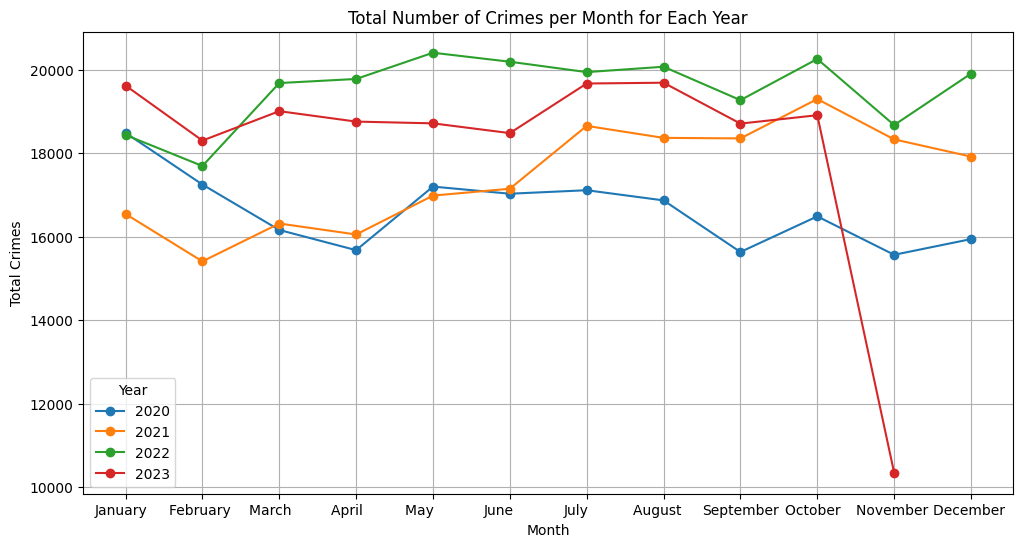

In [87]:

query = """
    SELECT
        date.year,
        date.month_of_year_str,
        COUNT(fact_table.crime_key) AS total_crimes
    FROM
        fact_table
    JOIN
        date ON fact_table.date_occ_key = date.key
    GROUP BY
        date.year, date.month_of_year_str
    ORDER BY
        date.year, MIN(date.month_of_year);
"""

crime_count_month_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(12, 6))

for year in crime_count_month_df['year'].unique():
    subset_df = crime_count_month_df[crime_count_month_df['year'] == year]
    plt.plot(subset_df['month_of_year_str'], subset_df['total_crimes'], label=str(year), marker='o')

plt.title('Total Number of Crimes per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.legend(title='Year')
plt.grid(True)
plt.show()



1. **Summary of Quarterly Crime Data**:
   - The data reveals the total crimes for each quarter over a four-year period, offering insights into seasonal trends and year-over-year changes in crime rates.

2. **Analysis of Yearly and Seasonal Trends**:
   - **2020**: Showed a gradual decrease in crime rates from the first to the fourth quarter.
   - **2021**: Started with slightly lower crime numbers than the same period in 2020, but saw a steady increase in each subsequent quarter, peaking in Q4.
   - **2022**: Marked the highest crime rates across all quarters compared to the previous years, with a notable peak in Q2.
   - **2023**: Demonstrated fluctuating crime numbers in the first three quarters, with a significant drop in Q4 because the data is avaliable till october only.

3. **Interpretation and Implications**:
   - The consistent rise in crime rates in 2021 and the peak in 2022 suggest an escalating trend in criminal activities or changes in socio-economic conditions during these periods.
   - The significant decrease in crimes in the fourth quarter of 2023 might indicate the effectiveness of crime prevention measures or a change in external factors impacting crime rates.
   - The data highlights the necessity for seasonal and quarter-specific strategies in crime management and resource allocation.

We use this SQL query to find the top seven months with the highest total crime counts across all years, by joining our fact table with the date table and grouping the results by year and month.

In [88]:
%%sql
SELECT
    date.year,
    date.month_of_year_str,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    date ON ft.date_occ_key = date.key
GROUP BY
    date.year, date.month_of_year_str
ORDER BY
    total_crimes desc limit 7;


 * postgresql://student@/group15final
7 rows affected.


year,month_of_year_str,total_crimes
2022,May,20413
2022,October,20263
2022,June,20197
2022,August,20077
2022,July,19948
2022,December,19912
2022,April,19784


1. **Identification of Peak Crime Months**:
   - The analysis begins by listing the months with the highest crime rates in 2022, providing specific figures for each month to illustrate the data clearly.
   - Each month is presented alongside its total crime count, giving a detailed view of when criminal activities were most prevalent.

2. **Observation of the Most Affected Months**:
   - After enumerating the monthly data, the text highlights that May, October, and June are among the months with the highest crime rates.
   - This observation is important to identify specific periods within the year when the city experienced the most criminal activities.

3. **Analysis and Interpretation of Trends**:
   - The analysis interprets these findings, suggesting that certain months, notably May and October, might have specific conditions or events that lead to higher crime rates.
   - It posits that these periods could be significant for law enforcement agencies for strategic planning and resource allocation.

4. **Additional Insights and Broader Implications**:
   - Beyond identifying the peak months, the analysis notes that the crime rates in other months like July, December, and April were also relatively high, though not the highest.
   - This indicates a need for a continuous and adaptive approach to crime prevention and public safety throughout the year.

5. **Conclusion**:
   - The concluding remark synthesizes the analysis, stating that the monthly crime data of 2022 reflect significant variations in criminal activities across different times of the year.

## Question2：

### ***What are the top 10 types of crimes that have been solved and unsolved?***

Our team chose to explore this question within the dataset because understanding the resolution status of different types of crimes is crucial for public safety and law enforcement efficiency. Analyzing solved and unsolved crime cases allows us to delve deeper into crime patterns, thereby providing data support for optimizing law enforcement strategies and effective allocation of public resources. 

To answer this question, we conducted a series of database query analyses, focusing on two key aspects: 

- 1. we identified the top 10 types of crimes with the highest number of solved and unsolved cases; 
- 2. we further investigated which cases within these crime types have been resolved and which remain open. 

Through these queries, we aim to obtain a clear picture of the distribution of crime types and their resolution status.

Total Number of Solved and Unsolved Crime 

First, our team used conditional sum (SUM(CASE WHEN ... THEN ... ELSE ... END)) to separately calculate the total number of solved and unsolved cases across the entire database.

In [89]:
%%sql
SELECT
    SUM(CASE WHEN status_table.status = 'IC' THEN 0 ELSE 1 END) AS total_solved_cases,
    SUM(CASE WHEN status_table.status = 'IC' THEN 1 ELSE 0 END) AS total_unsolved_cases
FROM
    fact_table
JOIN
    status_table ON fact_table.status_key = status_table.status_key;

 * postgresql://student@/group15final
1 rows affected.


total_solved_cases,total_unsolved_cases
168389,675125


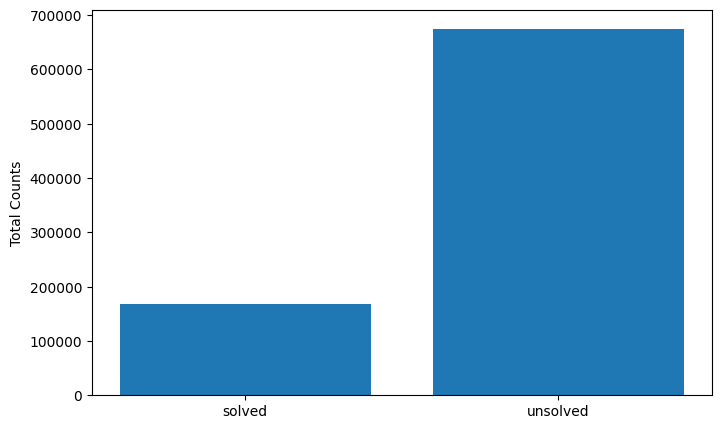

In [90]:
plt.figure(figsize=(8,5))
plt.bar( ["solved", "unsolved"], [168389,675125])
plt.ylabel("Total Counts")
plt.show()

Then, we identified and listed the top 10 types of crimes with the highest number of solved cases by joining relevant tables and applying a condition to filter out crimes that have been marked as solved (where the status is not 'IC') where the case is still contniued

In [91]:
%%sql
WITH SolvedCrimes AS (
    SELECT
        crime_table.crm_cd_desc AS crime_name,
        COUNT(*) AS solved_count
    FROM
        fact_table
    JOIN
        status_table ON fact_table.status_key = status_table.status_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    WHERE
        status_table.status <> 'IC'
    GROUP BY
        crime_table.crm_cd_desc
    ORDER BY
        solved_count DESC
    LIMIT 10
)

SELECT
    crime_name,
    solved_count
FROM
    SolvedCrimes;



 * postgresql://student@/group15final
10 rows affected.


crime_name,solved_count
INTIMATE PARTNER - SIMPLE ASSAULT,26413
BATTERY - SIMPLE ASSAULT,21204
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",18374
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",8824
INTIMATE PARTNER - AGGRAVATED ASSAULT,8595
CRIMINAL THREATS - NO WEAPON DISPLAYED,8305
ROBBERY,7923
VEHICLE - STOLEN,6113
VIOLATION OF RESTRAINING ORDER,5661
BURGLARY,5589


The data from the query clearly shows that it emphasizes the most frequently solved types of crimes, with "Intimate Partner - Simple Assault" being the most prevalent, having 26,413 cases resolved. This query not only reveals the specific categories of crimes with a higher resolution rate but also highlights the diverse nature of these crimes, ranging from assault and battery to vandalism and burglary. The prominence of assault-related crimes, especially those involving intimate partners, as the most resolved cases, provides valuable insights into the patterns of crime resolution within the dataset.

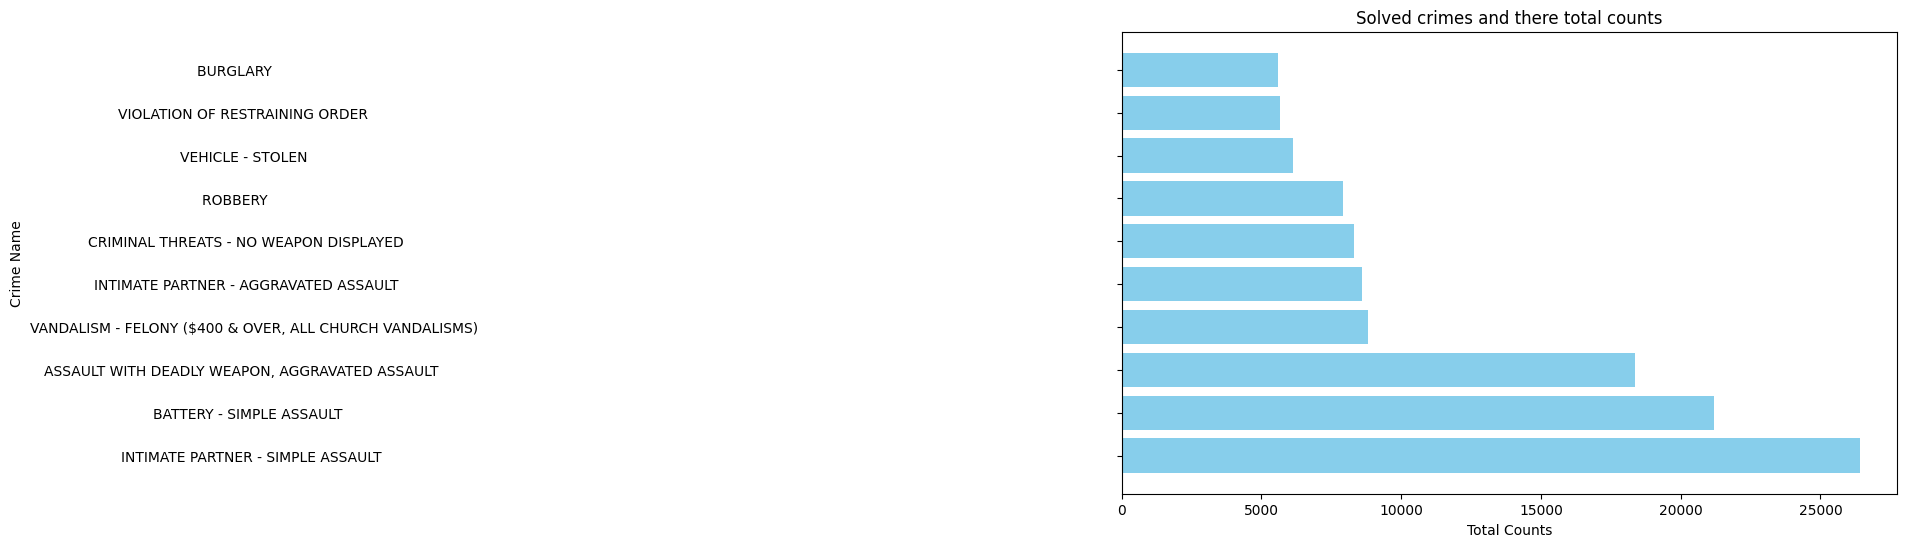

<Figure size 640x480 with 0 Axes>

In [92]:
query = """
    WITH SolvedCrimes AS (
        SELECT
            crime_table.crm_cd_desc AS crime_name,
            COUNT(*) AS solved_count
        FROM
            fact_table
        JOIN
            status_table ON fact_table.status_key = status_table.status_key
        JOIN
            crime_table ON fact_table.crime_key = crime_table.crime_key
        WHERE
            status_table.status <> 'IC'
        GROUP BY
            crime_table.crm_cd_desc
        ORDER BY
            solved_count DESC
        LIMIT 10
    )

    SELECT
        crime_name,
        solved_count
    FROM
        SolvedCrimes;
"""

solved_crimes_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(10, 6))
plt.barh(solved_crimes_df["crime_name"], solved_crimes_df["solved_count"],color='skyblue')

plt.xlabel('Total Counts')
plt.ylabel('Crime Name')
plt.title('Solved crimes and there total counts')

plt.show()
plt.savefig('solved_crimes_plot.png')

Top 10 Unsolved Crimes

Subsequently, we focused on showcasing the types of crimes that are most challenging to solve in the dataset by joining the necessary tables and applying a condition to specifically select crimes marked as unsolved (where the status is 'IC').

In [93]:
%%sql
WITH UnsolvedCrimes AS (
    SELECT
        crime_table.crm_cd_desc AS crime_name,
        COUNT(*) AS unsolved_count
    FROM
        fact_table
    JOIN
        status_table ON fact_table.status_key = status_table.status_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    WHERE
        status_table.status = 'IC'
    GROUP BY
        crime_table.crm_cd_desc
    ORDER BY
        unsolved_count DESC
    LIMIT 10
)

SELECT
    crime_name,
    Unsolved_count
FROM
    unSolvedCrimes;


 * postgresql://student@/group15final
10 rows affected.


crime_name,unsolved_count
VEHICLE - STOLEN,84351
THEFT OF IDENTITY,52214
BURGLARY FROM VEHICLE,50856
BATTERY - SIMPLE ASSAULT,46096
BURGLARY,45774
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",42494
THEFT PLAIN - PETTY ($950 & UNDER),40447
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),32078
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30096
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),29890


"Vehicle - Stolen" ranks at the top of the list of unsolved crimes with 84,351 cases, signifying a substantial challenge in resolving vehicle theft issues. The data also underscores other major categories of unsolved crimes, such as "Theft of Identity", "Burglary from Vehicle", and various forms of assault and burglary.

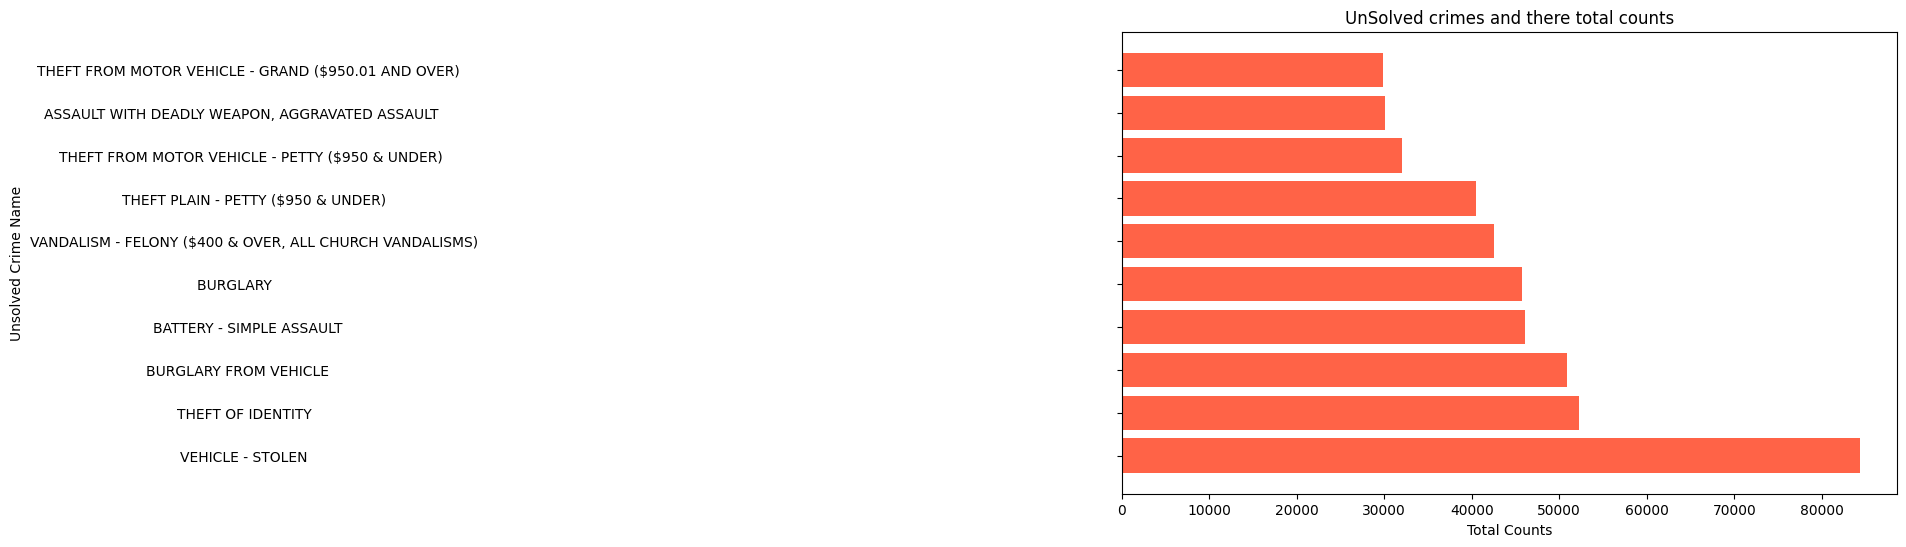

<Figure size 640x480 with 0 Axes>

In [94]:
query = """
    WITH UnsolvedCrimes AS (
        SELECT
            crime_table.crm_cd_desc AS crime_name,
            COUNT(*) AS unsolved_count
        FROM
            fact_table
        JOIN
            status_table ON fact_table.status_key = status_table.status_key
        JOIN
            crime_table ON fact_table.crime_key = crime_table.crime_key
        WHERE
            status_table.status = 'IC'
        GROUP BY
            crime_table.crm_cd_desc
        ORDER BY
            unsolved_count DESC
        LIMIT 10
    )

    SELECT
        crime_name,
        unsolved_count
    FROM
        UnsolvedCrimes;
"""

unsolved_crimes_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(10, 6))
plt.barh(unsolved_crimes_df["crime_name"], unsolved_crimes_df["unsolved_count"],color='tomato')

plt.xlabel('Total Counts')
plt.ylabel('Unsolved Crime Name')
plt.title('UnSolved crimes and there total counts')

plt.show()
plt.savefig('Unsolved_crimes_plot.png')


Finally, we provided a comprehensive view of crime statistics by listing the top 5 crime types based on their total case count, along with detailed information on the solved and unsolved cases for each type.

In [95]:
%%sql
WITH CrimeCounts AS (
    SELECT
        crime_table.crm_cd_desc AS crime_description,
        COUNT(*) AS total_cases,
        SUM(CASE WHEN status_table.status = 'IC' THEN 0 ELSE 1 END) AS solved_cases,
        SUM(CASE WHEN status_table.status = 'IC' THEN 1 ELSE 0 END) AS unsolved_cases
    FROM
        fact_table
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    JOIN
        status_table ON fact_table.status_key = status_table.status_key
    GROUP BY
        crime_description
    ORDER BY
        total_cases DESC
    LIMIT 5
)

SELECT
    crime_description,
    total_cases,
    solved_cases,
    unsolved_cases
FROM
    CrimeCounts;


 * postgresql://student@/group15final
5 rows affected.


crime_description,total_cases,solved_cases,unsolved_cases
VEHICLE - STOLEN,90464,6113,84351
BATTERY - SIMPLE ASSAULT,67300,21204,46096
THEFT OF IDENTITY,53026,812,52214
BURGLARY FROM VEHICLE,51906,1050,50856
BURGLARY,51363,5589,45774


The crime of "Vehicle - Stolen" stands out prominently, with a total of 90,464 cases, of which only 6,113 have been solved, leaving a substantial 84,351 cases unsolved. "Battery - Simple Assault" follows closely with a total of 67,300 cases, 21,204 of which have been solved, and 46,096 remaining unsolved. "Theft of Identity" has a high total number of cases (53,026), but a low resolution rate, with only 812 solved out of 52,214 unsolved cases. There is also a significant gap between the total and solved cases for "Burglary from Vehicle" and "Burglary", indicating challenges in resolving these types of crimes.

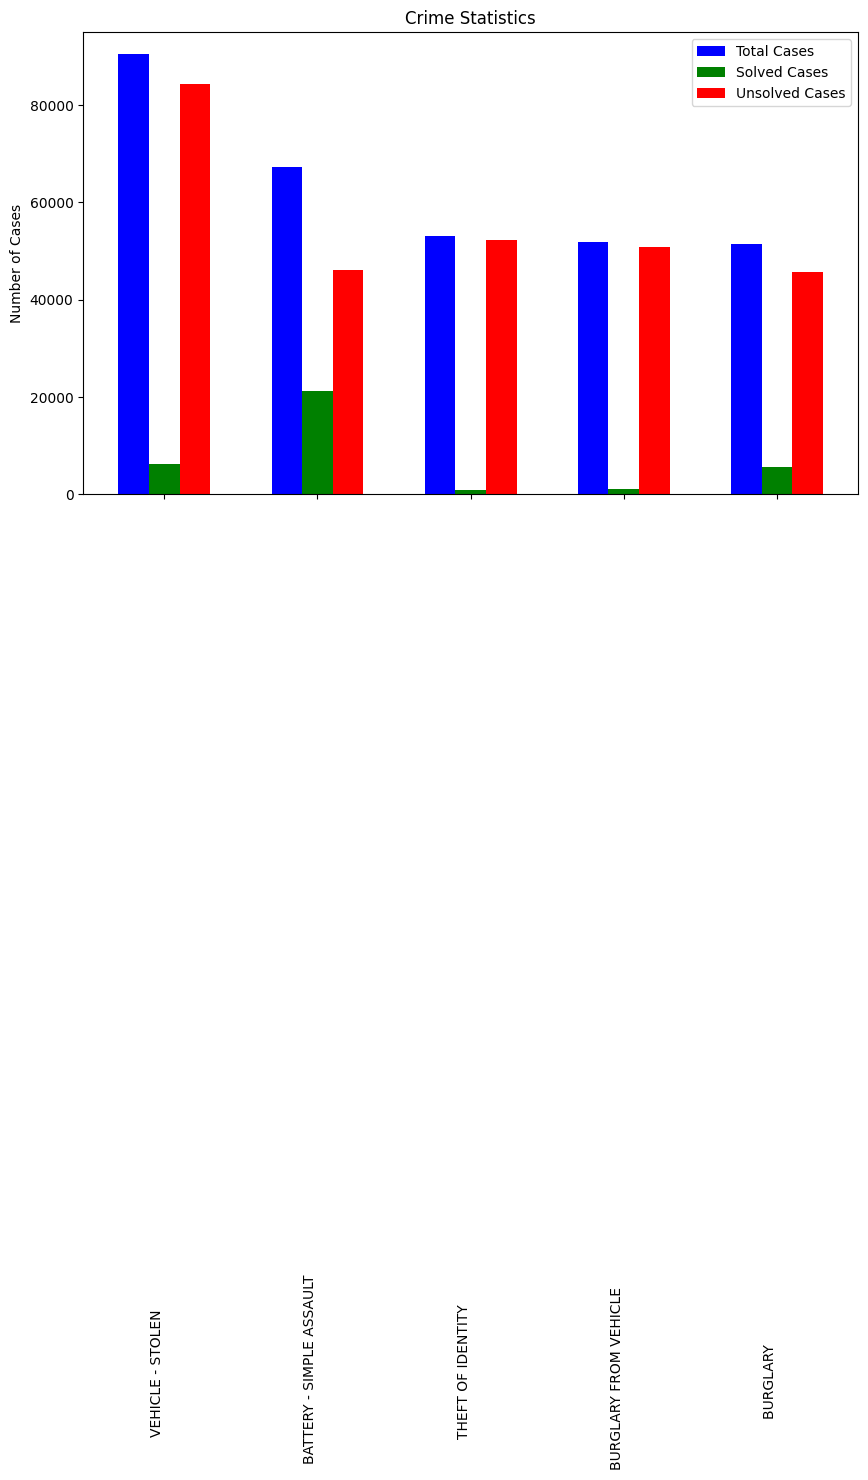

In [96]:

query = """
    WITH CrimeCounts AS (
        SELECT
            crime_table.crm_cd_desc AS crime_description,
            COUNT(*) AS total_cases,
            SUM(CASE WHEN status_table.status = 'IC' THEN 0 ELSE 1 END) AS solved_cases,
            SUM(CASE WHEN status_table.status = 'IC' THEN 1 ELSE 0 END) AS unsolved_cases
        FROM
            fact_table
        JOIN
            crime_table ON fact_table.crime_key = crime_table.crime_key
        JOIN
            status_table ON fact_table.status_key = status_table.status_key
        GROUP BY
            crime_description
        ORDER BY
            total_cases DESC
        LIMIT 5
    )

    SELECT
        crime_description,
        total_cases,
        solved_cases,
        unsolved_cases
    FROM
        CrimeCounts;
"""
crime_counts_df = pd.read_sql_query(query, connection_url)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = range(len(crime_counts_df['crime_description']))

ax.bar(bar_positions, crime_counts_df['total_cases'], width=bar_width, label='Total Cases', color='blue')

ax.bar([pos + bar_width for pos in bar_positions], 
       crime_counts_df['solved_cases'], width=bar_width, label='Solved Cases', color='green')

ax.bar([pos + 2 * bar_width for pos in bar_positions],
       crime_counts_df['unsolved_cases'], width=bar_width,
       label='Unsolved Cases', color='red')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(crime_counts_df['crime_description'])
ax.set_ylabel('Number of Cases')

ax.set_title('Crime Statistics')
ax.legend()
plt.xticks(rotation=90, ha='right')
plt.show()

## Question3：

### ***What is the distribution of total crime victims across different age groups? And What are the top 3 crimes and their counts for each age group of the victims?***

Our team embarked on this inquiry not only to reveal the prevalence of victimization across different age groups but also to uncover the specific types of crimes that predominantly affect each group. 
- Initially, our aim was to determine the distribution of crime victims across various age brackets. This involved analyzing the total number of victims in each age category to observe any emerging patterns or trends. 
- Subsequently, we endeavored to identify the top three crimes within each age group, along with their respective counts.

Distribution of total crime accross Different age groups

Firstly, we conducted a query that involved connecting the necessary tables and categorizing victims into distinct age groups. This categorization was achieved using the CASE WHEN statement to assign each victim to the appropriate age group.

In [97]:
%%sql
SELECT
    CASE
        WHEN victim_table.vict_age BETWEEN 0 AND 12 THEN 'Kids (0-12)'
        WHEN victim_table.vict_age BETWEEN 13 AND 30 THEN 'Teens and Young Adults (13-30)'
        WHEN victim_table.vict_age BETWEEN 31 AND 45 THEN 'Adults (31-45)'
        WHEN victim_table.vict_age BETWEEN 46 AND 60 THEN 'Middle-Aged (46-60)'
        WHEN victim_table.vict_age > 60 THEN 'Seniors (60+)'
        ELSE 'Unknown'
    END AS age_group,
    COUNT(*) AS total_victims
FROM
    fact_table
JOIN
    victim_table ON fact_table.victim_key = victim_table.victim_key
GROUP BY
    age_group
ORDER BY
    total_victims DESC;

 * postgresql://student@/group15final
5 rows affected.


age_group,total_victims
Adults (31-45),220759
Teens and Young Adults (13-30),201944
Middle-Aged (46-60),132648
Seniors (60+),71770
Kids (0-12),7284


- "Adults (31-45)" had the highest number of total victims, with 220,759 individuals affected.
- "Teens and Young Adults (13-30)" followed closely with 201,944 total victims.
- "Middle-Aged (46-60)" had 132,648 victims.
- "Seniors (60+)" experienced 71,770 cases of victimization.
- "Kids (0-12)" had the lowest number of victims at 7,284.

This analysis highlights the variations in victimization patterns among different age groups, with adults between the ages of 31 and 45 being the most significantly affected by crime in the dataset.

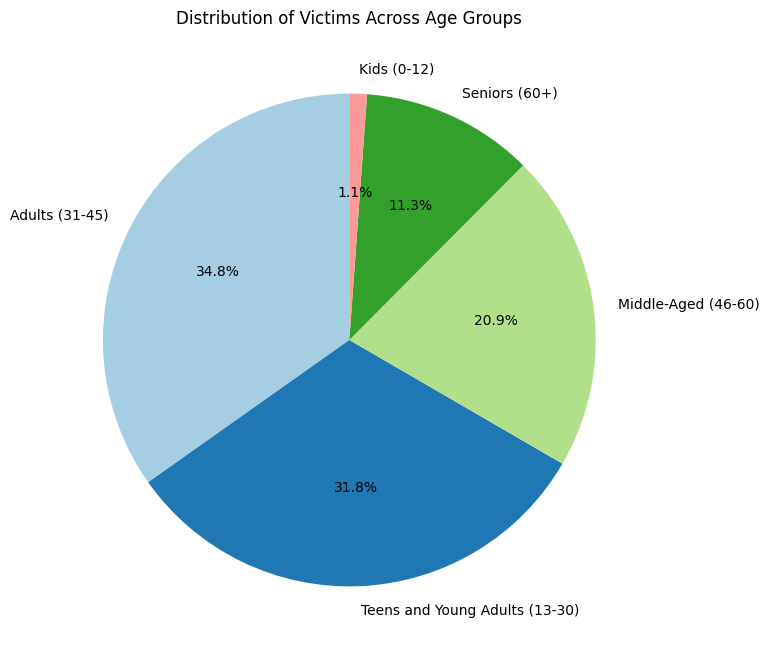

In [98]:
query = """
    SELECT
        CASE
            WHEN victim_table.vict_age BETWEEN 0 AND 12 THEN 'Kids (0-12)'
            WHEN victim_table.vict_age BETWEEN 13 AND 30 THEN 'Teens and Young Adults (13-30)'
            WHEN victim_table.vict_age BETWEEN 31 AND 45 THEN 'Adults (31-45)'
            WHEN victim_table.vict_age BETWEEN 46 AND 60 THEN 'Middle-Aged (46-60)'
            WHEN victim_table.vict_age > 60 THEN 'Seniors (60+)'
            ELSE 'Unknown'
        END AS age_group,
        COUNT(*) AS total_victims
    FROM
        fact_table
    JOIN
        victim_table ON fact_table.victim_key = victim_table.victim_key
    GROUP BY
        age_group
    ORDER BY
        total_victims DESC;
"""

victim_age_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(8, 8))
plt.pie(victim_age_df['total_victims'], labels=victim_age_df['age_group'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Victims Across Age Groups')
plt.show()

Then, we created this query, using a CASE WHEN statement to categorize victims into specific age groups, and subsequently calculated the occurrence counts of different crime descriptions within each age group.

In [99]:
%%sql
WITH AgeGroups AS (
    SELECT
        CASE
            WHEN vict_age BETWEEN 0 AND 12 THEN 'Kids'
            WHEN vict_age BETWEEN 13 AND 30 THEN 'Teen and Young'
            WHEN vict_age BETWEEN 31 AND 45 THEN 'Adults'
            WHEN vict_age BETWEEN 46 AND 60 THEN 'Middle-Aged'
            WHEN vict_age > 60 THEN 'Seniors'
            ELSE 'Unknown'
        END AS age_group,
        crm_cd_desc AS crime_description,
        COUNT(*) AS crime_count,
        ROW_NUMBER() OVER (PARTITION BY CASE
                                        WHEN vict_age BETWEEN 0 AND 12 THEN 'Kids'
                                        WHEN vict_age BETWEEN 13 AND 30 THEN 'Teen and Young'
                                        WHEN vict_age BETWEEN 31 AND 45 THEN 'Adults'
                                        WHEN vict_age BETWEEN 46 AND 60 THEN 'Middle-Aged'
                                        WHEN vict_age > 60 THEN 'Seniors'
                                        ELSE 'Unknown'
                                      END
                          ORDER BY COUNT(*) DESC) AS row_num
    FROM
        fact_table
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    JOIN
        victim_table ON fact_table.victim_key = victim_table.victim_key
    GROUP BY
        age_group, crm_cd_desc
)

SELECT
    age_group,
    crime_description,
    crime_count
FROM
    AgeGroups
WHERE
    row_num <= 3
ORDER BY
    age_group, crime_count DESC;

 * postgresql://student@/group15final
15 rows affected.


age_group,crime_description,crime_count
Adults,THEFT OF IDENTITY,21066
Adults,BATTERY - SIMPLE ASSAULT,20136
Adults,BURGLARY FROM VEHICLE,19965
Kids,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,1669
Kids,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),1026
Kids,BATTERY - SIMPLE ASSAULT,777
Middle-Aged,BATTERY - SIMPLE ASSAULT,15847
Middle-Aged,THEFT OF IDENTITY,11016
Middle-Aged,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",9839
Seniors,BATTERY - SIMPLE ASSAULT,8868


For Adults:
1. "THEFT OF IDENTITY" was the most common crime with 21,066 cases.
2. "BATTERY - SIMPLE ASSAULT" followed closely with 20,136 cases.
3. "BURGLARY FROM VEHICLE" ranked third with 19,965 cases.

For Kids:
1. "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT" had the highest occurrence with 1,669 cases.
2. "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)" had 1,026 cases.
3. "BATTERY - SIMPLE ASSAULT" ranked third with 777 cases.

For Middle-Aged:
1. "BATTERY - SIMPLE ASSAULT" was the most common crime with 15,847 cases.
2. "THEFT OF IDENTITY" followed with 11,016 cases.
3. "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT" ranked third with 9,839 cases.

For Seniors:
1. "BATTERY - SIMPLE ASSAULT" had the highest occurrence with 8,868 cases.
2. "BURGLARY" followed with 7,734 cases.
3. "THEFT OF IDENTITY" ranked third with 6,609 cases.

For Teens and Young:
1. "BATTERY - SIMPLE ASSAULT" was the most common crime with 20,810 cases.
2. "INTIMATE PARTNER - SIMPLE ASSAULT" followed closely with 17,782 cases.
3. "BURGLARY FROM VEHICLE" ranked third with 17,182 cases.

This analysis highlights the specific crimes within the dataset that disproportionately impact victims of different age groups. It draws attention to the groups that require the most protection and underscores that crime patterns that need particular attention vary across demographics.

## Other Intresting Facts

## *Which areas or neighborhoods have the highest and lowest crime rates?*

Our group aims to contribute to the resolution of societal issues and enhance community safety and social equity by conducting research on areas with the highest and lowest crime rates. This study holds significant importance for policymakers, social workers, and criminologists alike.

Crime Distribution with Respect to the Area:

Top Crime 7 Areas:

We determine the seven areas with the highest total crime counts, by joining our fact table with the location table and grouping the results by area name.

In [100]:
%%sql
SELECT
    lt.area_name,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    location_table lt ON ft.location_key = lt.location_key
GROUP BY
    lt.area_name
ORDER BY
    total_crimes DESC LIMIT 7;

 * postgresql://student@/group15final
7 rows affected.


area_name,total_crimes
Central,56942
77th Street,53096
Pacific,49307
Southwest,47355
Hollywood,44636
Southeast,42906
Olympic,42540


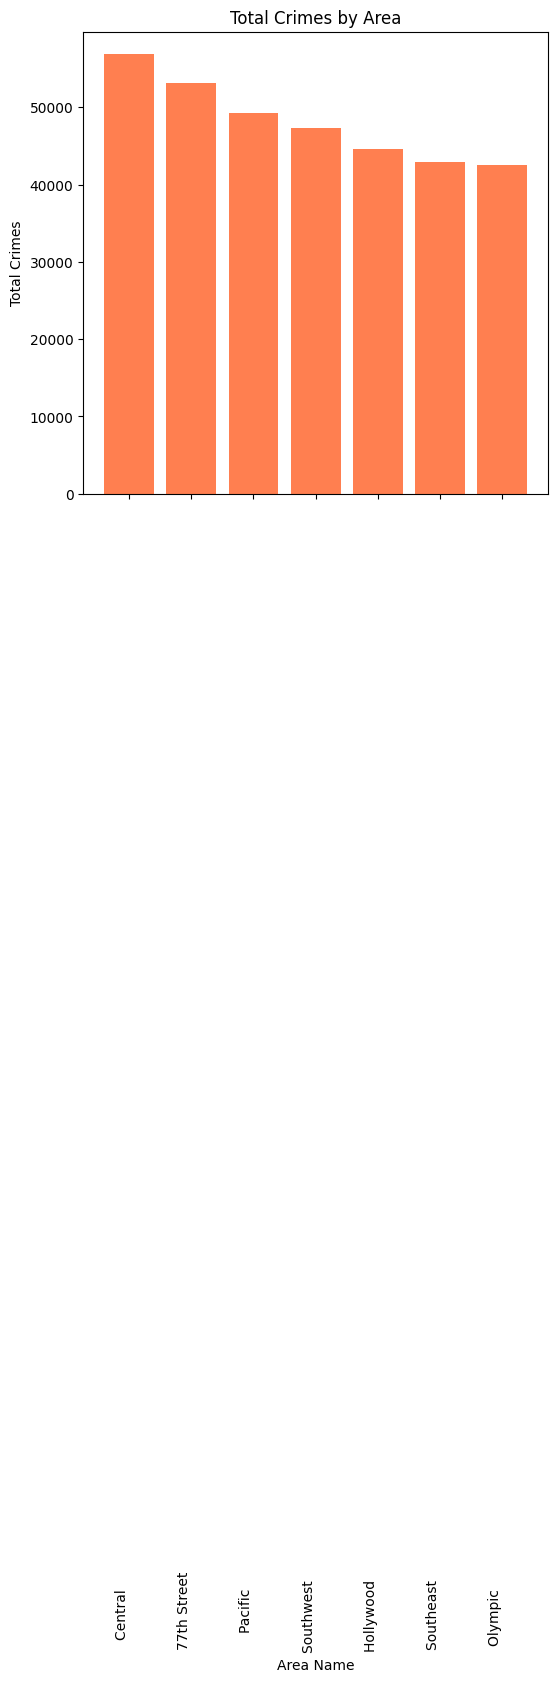

In [101]:
query = """
    SELECT
        lt.area_name,
        COUNT(ft.crime_key) AS total_crimes
    FROM
        fact_table ft
    JOIN
        location_table lt ON ft.location_key = lt.location_key
    GROUP BY
        lt.area_name
    ORDER BY
        total_crimes DESC
    LIMIT 7;
"""

crime_areas_df = pd.read_sql_query(query, connection_url)

fig, ax = plt.subplots(figsize=(6, 6))


ax.bar(crime_areas_df['area_name'], crime_areas_df['total_crimes'], color='coral')
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Crimes')

ax.set_title('Total Crimes by Area')
plt.xticks(rotation=90, ha='right')
plt.show()


In the specified locations, the highest reported total crimes are in the "Central" area with 57,280 incidents, followed by "77th Street" with 53,324 incidents, and "Pacific" with 49,502 incidents. Other areas with significant crime counts include "Southwest" (47,581), "Hollywood" (44,790), "Southeast" (43,127), and "Olympic" (42,732).

Bottom 7 Crime Areas:

We identify the seven areas with the lowest total crime counts, by joining our fact table with the location table and grouping the results by area name, with results ordered in ascending order.

In [102]:
%%sql
SELECT
    lt.area_name,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    location_table lt ON ft.location_key = lt.location_key
GROUP BY
    lt.area_name
ORDER BY
    total_crimes ASC LIMIT 7;

 * postgresql://student@/group15final
7 rows affected.


area_name,total_crimes
Foothill,28075
Hollenbeck,31608
Mission,33592
Devonshire,34198
Topanga,34325
Harbor,34795
West Valley,35305


Top areas where most number of crimes are solved

In [103]:
%%sql
WITH SolvedCrimesByArea AS (
    SELECT
        lt.area_name,
        COUNT(ft.crime_key) AS solved_count
    FROM
        fact_table ft
    JOIN
        location_table lt ON ft.location_key = lt.location_key
    JOIN
        status_table st ON ft.status_key = st.status_key
    WHERE
        st.status <> 'IC'
    GROUP BY
        lt.area_name
    ORDER BY
        solved_count DESC
    LIMIT 7
)

SELECT
    area_name,
    solved_count
FROM
    SolvedCrimesByArea;


 * postgresql://student@/group15final
7 rows affected.


area_name,solved_count
77th Street,12246
N Hollywood,10234
West Valley,9224
Southwest,9054
Rampart,8978
Harbor,8905
Olympic,8828


Number of Crimes for Top 5 Areas with respect to the years



We identify the yearly total crime counts for the top four areas with the highest crimes. This is done by first selecting the four areas with the highest crime counts and then calculating the total crimes for each year in these areas.

In [104]:
%%sql
WITH TopAreas AS (
    SELECT
        lt.area_name,
        COUNT(ft.crime_key) AS total_crimes
    FROM
        fact_table ft
    JOIN
        location_table lt ON ft.location_key = lt.location_key
    GROUP BY
        lt.area_name
    ORDER BY
        total_crimes DESC
    LIMIT 4
)

SELECT
    ta.area_name,
    date.year,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    location_table lt ON ft.location_key = lt.location_key
JOIN
    date ON ft.date_occ_key = date.key
JOIN
    TopAreas ta ON lt.area_name = ta.area_name
GROUP BY
    ta.area_name, date.year
ORDER BY
     date.year, total_crimes desc;


 * postgresql://student@/group15final
16 rows affected.


area_name,year,total_crimes
77th Street,2020,13303
Central,2020,11589
Pacific,2020,11559
Southwest,2020,11155
Central,2021,13153
77th Street,2021,13074
Pacific,2021,12916
Southwest,2021,11390
Central,2022,17671
77th Street,2022,14530


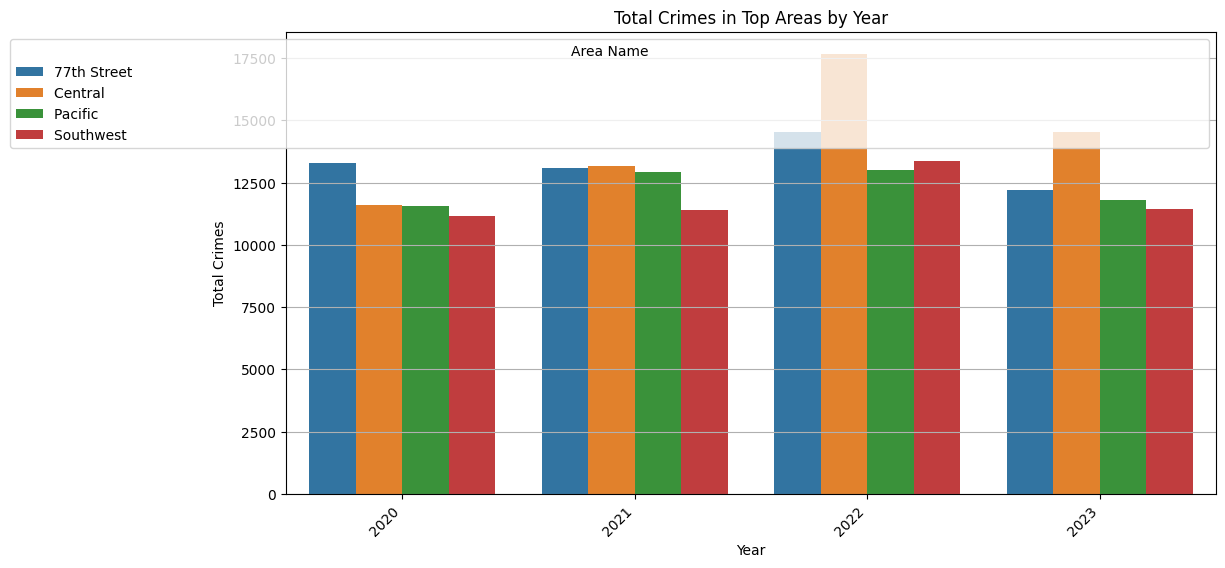

In [105]:
query = """
    WITH TopAreas AS (
        SELECT
            lt.area_name,
            COUNT(ft.crime_key) AS total_crimes
        FROM
            fact_table ft
        JOIN
            location_table lt ON ft.location_key = lt.location_key
        GROUP BY
            lt.area_name
        ORDER BY
            total_crimes DESC
        LIMIT 4
    )

    SELECT
        ta.area_name,
        date.year,
        COUNT(ft.crime_key) AS total_crimes
    FROM
        fact_table ft
    JOIN
        location_table lt ON ft.location_key = lt.location_key
    JOIN
        date ON ft.date_occ_key = date.key
    JOIN
        TopAreas ta ON lt.area_name = ta.area_name
    GROUP BY
        ta.area_name, date.year
    ORDER BY
         date.year, total_crimes DESC;
"""

top_areas_crimes_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='total_crimes', hue='area_name', data=top_areas_crimes_df)
plt.title('Total Crimes in Top Areas by Year')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Area Name', loc='upper right')
plt.grid(axis='y')

plt.show()


Crime Type Dominance by Area

Then, we rank the most common types of crimes in each area, by joining our fact table with the location and crime tables, and then selecting the highest-ranked crime type for each area based on the total number of occurrences.

In [106]:
%%sql
WITH RankedCrimes AS (
    SELECT
        location_table.area_name,
        crime_table.crm_cd_desc,
        COUNT(fact_table.crime_key) AS total_crimes,
        ROW_NUMBER() OVER (PARTITION BY location_table.area_name ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
    FROM
        fact_table
    JOIN
        location_table ON fact_table.location_key = location_table.location_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    GROUP BY
        location_table.area_name, crime_table.crm_cd_desc
)

SELECT
    area_name,
    crm_cd_desc AS highest_crime_type,
    total_crimes
FROM
    RankedCrimes
WHERE
    crime_rank = 1;


 * postgresql://student@/group15final
21 rows affected.


area_name,highest_crime_type,total_crimes
77th Street,VEHICLE - STOLEN,6961
Central,BURGLARY FROM VEHICLE,7960
Devonshire,VEHICLE - STOLEN,3124
Foothill,VEHICLE - STOLEN,3537
Harbor,VEHICLE - STOLEN,4846
Hollenbeck,VEHICLE - STOLEN,4997
Hollywood,BATTERY - SIMPLE ASSAULT,4060
Mission,VEHICLE - STOLEN,4599
N Hollywood,VEHICLE - STOLEN,3904
Newton,VEHICLE - STOLEN,6626


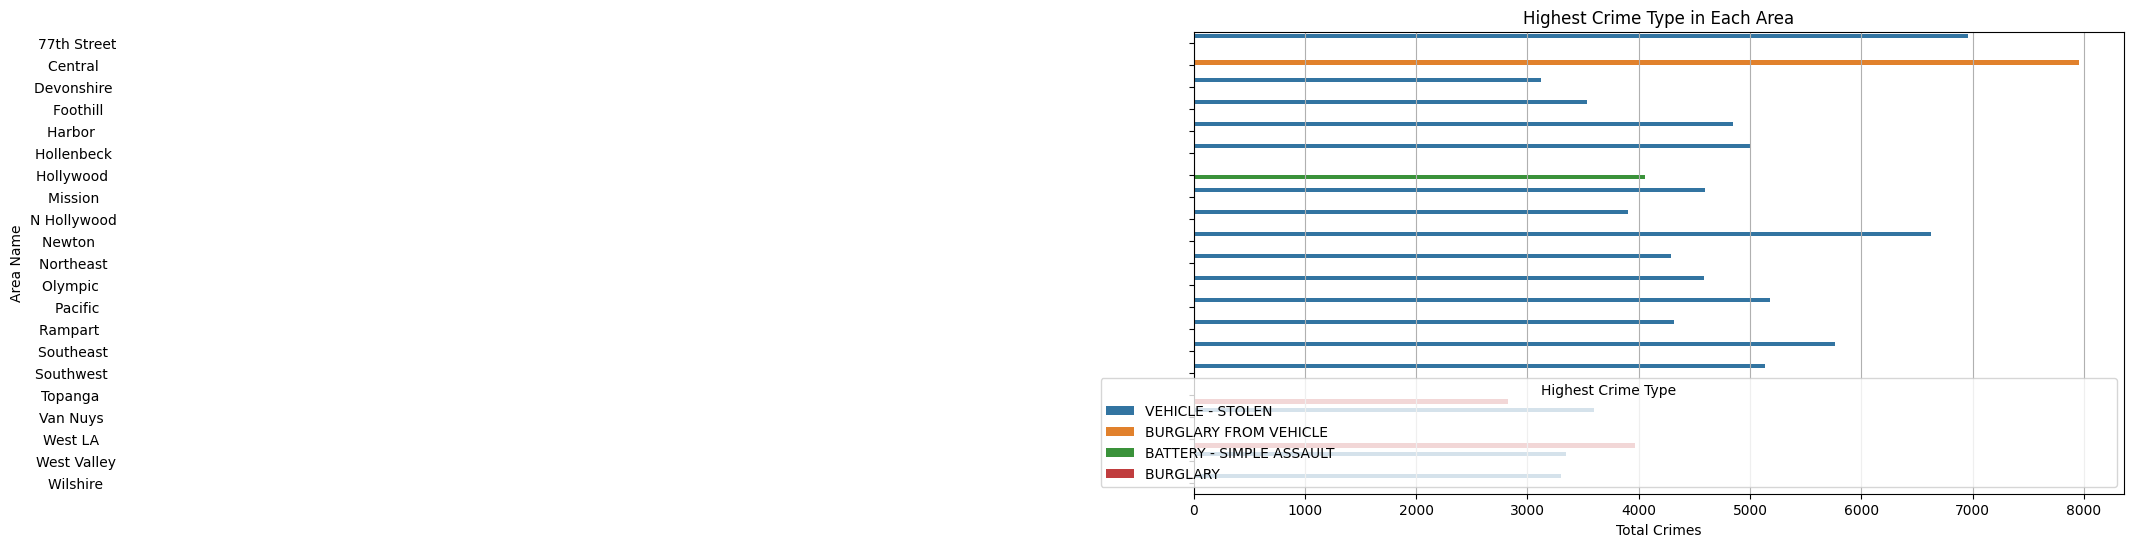

In [107]:
query = """
    WITH RankedCrimes AS (
        SELECT
            location_table.area_name,
            crime_table.crm_cd_desc,
            COUNT(fact_table.crime_key) AS total_crimes,
            ROW_NUMBER() OVER (PARTITION BY location_table.area_name ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
        FROM
            fact_table
        JOIN
            location_table ON fact_table.location_key = location_table.location_key
        JOIN
            crime_table ON fact_table.crime_key = crime_table.crime_key
        GROUP BY
            location_table.area_name, crime_table.crm_cd_desc
    )

    SELECT
        area_name,
        crm_cd_desc AS highest_crime_type,
        total_crimes
    FROM
        RankedCrimes
    WHERE
        crime_rank = 1;
"""

highest_crime_type_df = pd.read_sql_query(query, connection_url)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_crimes', y='area_name', hue='highest_crime_type', data=highest_crime_type_df, orient='h')
plt.title('Highest Crime Type in Each Area')
plt.xlabel('Total Crimes')
plt.ylabel('Area Name')
plt.legend(title='Highest Crime Type', loc='lower right')
plt.grid(axis='x')

plt.show()


1. **High Crime Areas**:
   - The areas 'Central', '77th Street', and 'Pacific' were identified as having the highest crime rates. These areas consistently showed elevated levels of criminal activities.

2. **Low Crime Areas**:
   - Conversely, 'Foothill', 'Hollenbeck', and 'Mission' emerged as neighborhoods with the lowest crime rates. This indicates a relatively safer environment in these areas.

3. **Yearly Trends in High Crime Areas**:
   - An analysis of yearly crime trends in the high crime areas revealed that 'Central' and '77th Street' had consistently high crime rates across the years. Notably, 'Central' experienced a significant spike in crime in 2022.

4. **Dominant Crime Types**:
   - In terms of crime types, 'Vehicle - Stolen' was the most common crime in many areas, suggesting a city-wide issue with vehicle theft. However, some areas like 'Hollywood' and 'Topanga' showed different patterns, with 'Battery - Simple Assault' and 'Burglary' being more prevalent.

Top 10 Crime Reported Station

In [108]:
%%sql
WITH Top10Districts AS (
    SELECT
        location_table.rpt_dist_no AS reported_district,
        location_table.area_name AS area_name,
        COUNT(*) AS crime_count,
        ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS row_num
    FROM
        location_table
    JOIN
        fact_table ON location_table.location_key = fact_table.location_key
    GROUP BY
        reported_district, area_name
)

SELECT
    reported_district,
    area_name,
    crime_count
FROM
    Top10Districts
WHERE
    row_num <= 10
ORDER BY
    crime_count DESC;



 * postgresql://student@/group15final
10 rows affected.


reported_district,area_name,crime_count
162,Central,4459
645,Hollywood,4186
182,Central,4026
1494,Pacific,3820
646,Hollywood,3721
636,Hollywood,3406
111,Central,3267
2156,Topanga,3151
1822,Southeast,2800
152,Central,2523


## *What are the most common types of crimes, and how do they vary across different areas?*

Studying the most common types of crimes and their geographical variations is a vital endeavor that not only informs law enforcement and policymakers but also contributes to the overall safety and well-being of our communities while advancing the field of data analysis and criminology

We use this SQL query to identify and rank the top seven most common types of crimes based on their total occurrences, by joining our fact table with the crime table and grouping the results by crime description.

In [109]:
%%sql
SELECT
    crime_table.crm_cd_desc,
    COUNT(fact_table.crime_key) AS total_crimes
FROM
    fact_table
JOIN
    crime_table ON fact_table.crime_key = crime_table.crime_key
GROUP BY
    crime_table.crm_cd_desc
ORDER BY
    total_crimes DESC LIMIT 7;

 * postgresql://student@/group15final
7 rows affected.


crm_cd_desc,total_crimes
VEHICLE - STOLEN,90464
BATTERY - SIMPLE ASSAULT,67300
THEFT OF IDENTITY,53026
BURGLARY FROM VEHICLE,51906
BURGLARY,51363
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",51318
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",48470


The analysis reveals that "Vehicle - Stolen" is the most prevalent crime with a total of 90,464 incidents, indicating a significant issue with vehicle theft in the area. This is followed by "Battery - Simple Assault" and "Theft of Identity," highlighting concerns related to personal safety and identity security. Other notable crimes include "Burglary from Vehicle," "Burglary," and "Vandalism - Felony," each with over 50,000 reported incidents. Additionally, "Assault with Deadly Weapon, Aggravated Assault" features prominently, further emphasizing the need for focused law enforcement strategies to address these specific types of crimes.

Crime Association by Premises Analysis

We create a ranked list of the most associated types of crimes for each premise description, using the fact, premise, and crime tables.

In [110]:
%%sql
WITH RankedCrimes AS (
    SELECT
        premis_table.premis_desc,
        crime_table.crm_cd_desc,
        COUNT(fact_table.crime_key) AS total_crimes,
        ROW_NUMBER() OVER (ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
    FROM
        fact_table
    JOIN
        premis_table ON fact_table.premis_key = premis_table.premis_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    GROUP BY
        premis_table.premis_desc, crime_table.crm_cd_desc
)

SELECT
    premis_desc,
    crm_cd_desc AS most_associated_crime,
    total_crimes
FROM
    RankedCrimes
WHERE
    crime_rank <= 10;



 * postgresql://student@/group15final
10 rows affected.


premis_desc,most_associated_crime,total_crimes
STREET,VEHICLE - STOLEN,69621
SINGLE FAMILY DWELLING,THEFT OF IDENTITY,26017
STREET,BURGLARY FROM VEHICLE,21240
STREET,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),20691
STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",17076
SINGLE FAMILY DWELLING,BURGLARY,15928
"VEHICLE, PASSENGER/TRUCK","VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",15234
STREET,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),14733
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",INTIMATE PARTNER - SIMPLE ASSAULT,14594
SINGLE FAMILY DWELLING,INTIMATE PARTNER - SIMPLE ASSAULT,14262


/tmp/ipykernel_1683/2889431822.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


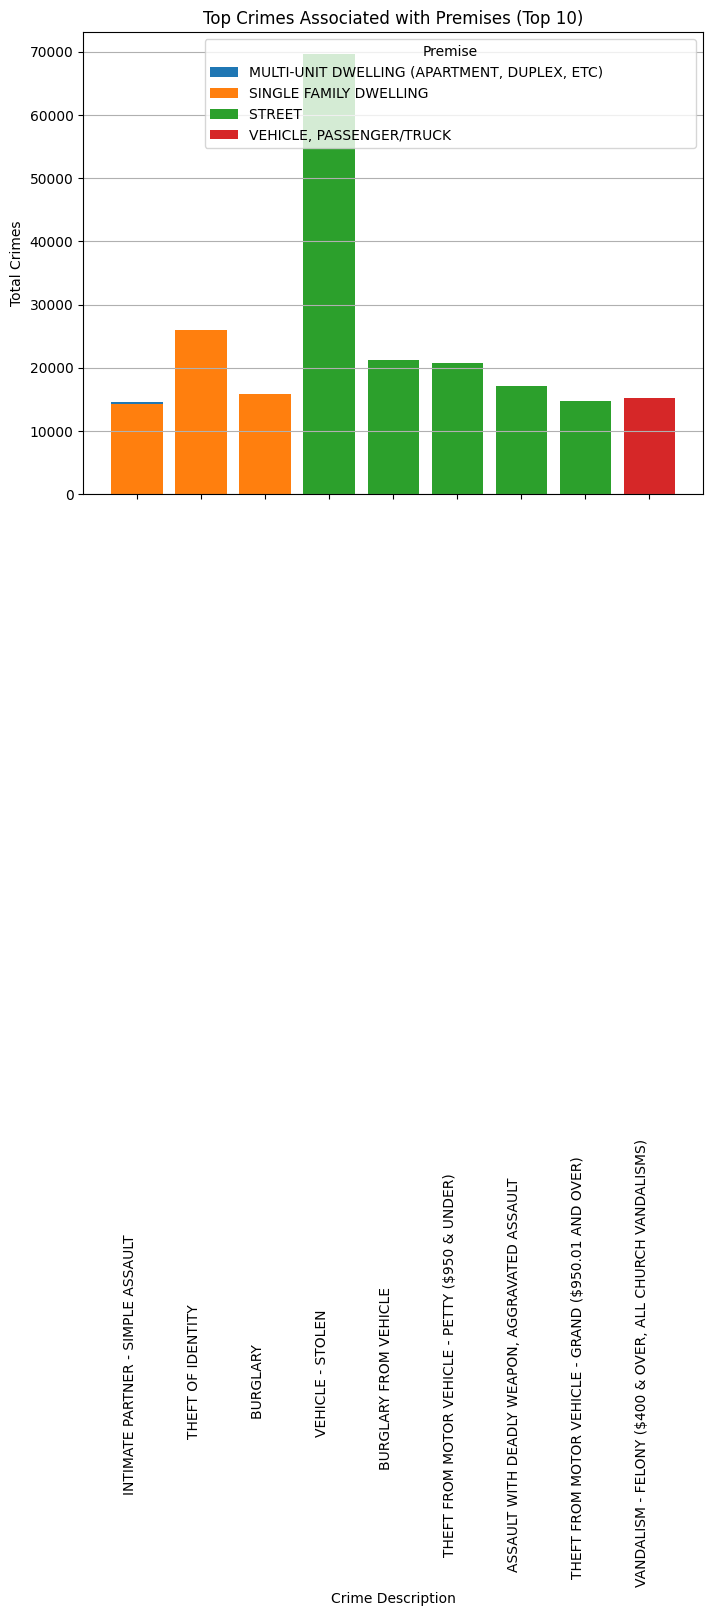

In [111]:
query = """
    WITH RankedCrimes AS (
        SELECT
            premis_table.premis_desc,
            crime_table.crm_cd_desc,
            COUNT(fact_table.crime_key) AS total_crimes,
            ROW_NUMBER() OVER (ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
        FROM
            fact_table
        JOIN
            premis_table ON fact_table.premis_key = premis_table.premis_key
        JOIN
            crime_table ON fact_table.crime_key = crime_table.crime_key
        GROUP BY
            premis_table.premis_desc, crime_table.crm_cd_desc
    )

    SELECT
        premis_desc,
        crm_cd_desc AS most_associated_crime,
        total_crimes
    FROM
        RankedCrimes
    WHERE
        crime_rank <= 10;
"""

ranked_crimes_df = pd.read_sql_query(query, connection_url)
plt.figure(figsize=(8, 6))
for premise, group in ranked_crimes_df.groupby('premis_desc'):
    plt.bar(group['most_associated_crime'], group['total_crimes'], label=premise)

plt.title('Top Crimes Associated with Premises (Top 10)')
plt.xlabel('Crime Description')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90, ha='right')  
plt.legend(title='Premise')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

We calculate the total occurrences of each crime type at each premise, rank them, and then select the top crime for each premise based on this ranking.

**The most common types of crimes and their variations across different areas can vary significantly depending on the location.**

1. **Theft and Burglary:**
   - Theft, including petty theft under 950 and grand theft over 950 , is a common crime in many urban areas.
   - Burglary, which involves breaking and entering a building with the intent to commit a crime, can occur in both residential and commercial areas.
   - The frequency of theft and burglary may vary based on the economic status of the neighborhood. Higher-income areas may experience fewer thefts, while lower-income areas may have higher rates.

2. **Assault and Battery:**
   - Simple assault and battery are common crimes in urban areas, often occurring in public places like streets, bars, and nightclubs.
   - Aggravated assault, which involves the use of a deadly weapon or causing severe injury, may be more prevalent in areas with higher crime rates.

3. **Robbery:**
   - Robbery, the act of taking property from someone using force or the threat of force, is more likely to occur in areas with higher population density.
   - Commercial areas, such as shopping malls and convenience stores, may be prone to robberies.

4. **Vandalism:**
   - Vandalism, which includes damage to property like graffiti and destruction of public facilities, can occur in both urban and suburban areas.
   - Areas with more public infrastructure may experience higher rates of vandalism.

5. **Identity Theft:**
   - Identity theft is a white-collar crime that can happen anywhere, often involving the theft of personal information for financial gain.
   - It can occur both online and offline, making it a widespread issue.

6. **Vehicle-Related Crimes:**
   - Vehicle theft and burglary from vehicles are common in areas with a high volume of parked cars, such as residential neighborhoods and parking lots.
   - Carjacking, a more violent crime, can happen in any area but may be more prevalent in certain neighborhoods.

7. **Drug-Related Offenses:**
   - Drug-related crimes, including possession and distribution, can occur in various areas, but drug hotspots may exist in neighborhoods with drug-related issues.

8. **Sexual Assault:**
   - Sexual assault can happen in any location but may be more prevalent in areas with nightlife, college campuses, or isolated areas.

9. **Domestic Violence:**
   - Domestic violence cases can occur in residential areas and may not always be reported to law enforcement.

10. **White-Collar Crimes:**
    - White-collar crimes like fraud, embezzlement, and money laundering can happen in business districts and corporate environments.

### How many crimes were solved each year?

In [112]:
%%sql
WITH SolvedCrimes AS (
    SELECT
        date.year,
        COUNT(fact_table.crime_key) AS solved_count
    FROM
        fact_table
    JOIN
        date ON fact_table.date_occ_key = date.key
    JOIN
        status_table ON fact_table.status_key = status_table.status_key
    WHERE
        status_table.status <> 'IC'
    GROUP BY
        date.year
)

SELECT
    year,
    solved_count
FROM
    SolvedCrimes
ORDER BY
    year;


 * postgresql://student@/group15final
4 rows affected.


year,solved_count
2020,47751
2021,45854
2022,44790
2023,29994


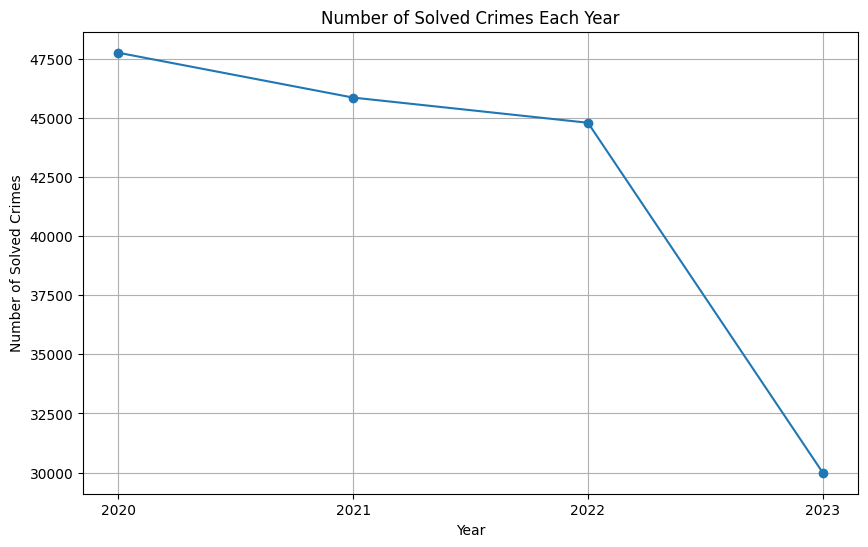

In [113]:
query = """
    WITH SolvedCrimes AS (
        SELECT
            date.year,
            COUNT(fact_table.crime_key) AS solved_count
        FROM
            fact_table
        JOIN
            date ON fact_table.date_occ_key = date.key
        JOIN
            status_table ON fact_table.status_key = status_table.status_key
        WHERE
            status_table.status <> 'IC'
        GROUP BY
            date.year
    )

    SELECT
        year,
        solved_count
    FROM
        SolvedCrimes
    ORDER BY
        year;
"""

solved_crimes_df = pd.read_sql_query(query, connection_url)


plt.figure(figsize=(10, 6))
plt.plot(solved_crimes_df['year'], solved_crimes_df['solved_count'], marker='o', linestyle='-')
plt.title('Number of Solved Crimes Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Solved Crimes')
plt.xticks(solved_crimes_df['year'].astype(int))  
plt.grid(True)
plt.show()

In the analysis of solved crimes over the past four years, the data reveals a varying trend. The highest number of crimes solved was observed in 2020, with 47,751 cases, followed by 2021 and 2022, each with 45,854 and 44,790 cases, respectively. However, there was a noticeable drop in solved crimes in 2023, reaching 29,994 cases. This information highlights the annual fluctuations in the effectiveness of law enforcement efforts in resolving reported crimes.

In [114]:
%%sql
WITH SolvedCrimes AS (
    SELECT
        date.year,
        date.quarter_of_year,
        COUNT(fact_table.crime_key) AS solved_count
    FROM
        fact_table
    JOIN
        date ON fact_table.date_occ_key = date.key
    JOIN
        status_table ON fact_table.status_key = status_table.status_key
    WHERE
        status_table.status <> 'IC'
    GROUP BY
        date.year, date.quarter_of_year
    ORDER BY
        date.year, date.quarter_of_year
)

SELECT
    year,
    quarter_of_year,
    solved_count
FROM
    SolvedCrimes
ORDER BY
    year, quarter_of_year;


 * postgresql://student@/group15final
16 rows affected.


year,quarter_of_year,solved_count
2020,1,12003
2020,2,12634
2020,3,12417
2020,4,10697
2021,1,11034
2021,2,11514
2021,3,12481
2021,4,10825
2022,1,10853
2022,2,11666
